# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
data = pd.read_csv('/content/stock_data.csv')

# make a copy of the data
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Checking the first 5 rows of the data
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
#checking the last 5 rows of the data
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


## Observation
#### The dataset seem to have been loaded properly and are well structured with all the columns containing the required data. Further analysis will be carried out to gain more insight into the data in the subsequent sections.

In [ ]:
# Viewing a random sample of the dataset
df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


## Observation
#### On viewing the 10 random sample of the dataset, it will be observed that the structure of the data in terms of its features are similar to the ones obtained when the top and bottom 5 rows were viewed.

In [ ]:
# Checking the shape of the dataset
df.shape

(340, 15)

## Observation
#### The dataset contained 340 rows and 15 columns (features).

In [ ]:
#checking the datatypes contained in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

## Observation
#### The dataset contained the object datatype (Ticker Symbol, Security,GICS Sector and  GICS Sub Industry) while the remaining features are of the float datatypes and the integer datatypes. From the Non-Null Count, it can be noted that there are no missing data in the dataset and the memory usage was about 40 KB.

In [ ]:
# Obtaining the summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


## Observation
#### The share price ranged between 4.5 dollars to 1275 dollars with an average price of 81 dollars. It should also be noted that there is a significant variability in the price since the standard deviation is higher than the mean price. Also, since there is a huge difference between the 75th percentile and the maximum price, the price data will probably contain lots of outliers and the distribution might be skewed to the right.
#### Similar argument can also be made for the remaining numerical features.

## Checking for duplicates

In [ ]:
#checking the dataset for duplicates
df.duplicated().sum()

0

#### There are no duplicated columns in the dataset

## Checking for missing value

In [ ]:
# Checking if the dataset contained some missing values
df.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


#### There are no missing values in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

## Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

#### Distribution of the current price data of the stocks

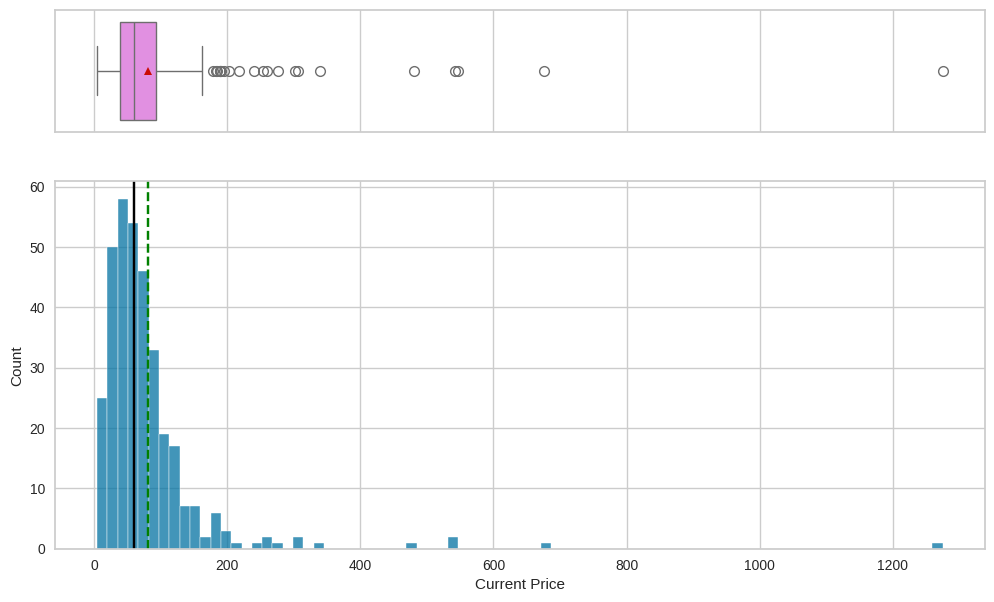

In [ ]:
histogram_boxplot(df, 'Current Price', figsize=(12, 7), kde=False, bins=None)

## Observation
#### As it was earlier stated, the distribution of the current price of the stocks is right-skewed with losts of outliers.

## Distribution of the Price Change Data of the stocks

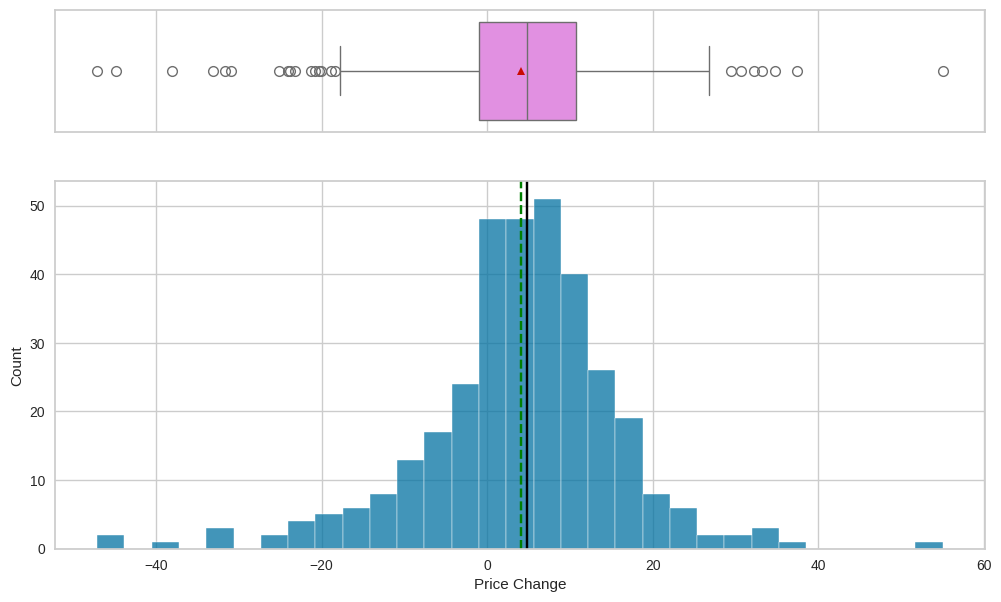

In [ ]:
histogram_boxplot(df, 'Price Change', figsize=(12, 7), kde=False, bins=None)

#### It will be noted that the distribution of the price change data of the stock is close to normal. However, there are lots of outliers to both the left and right of the curve.

## Distribution of the price Volatility data of the stocks

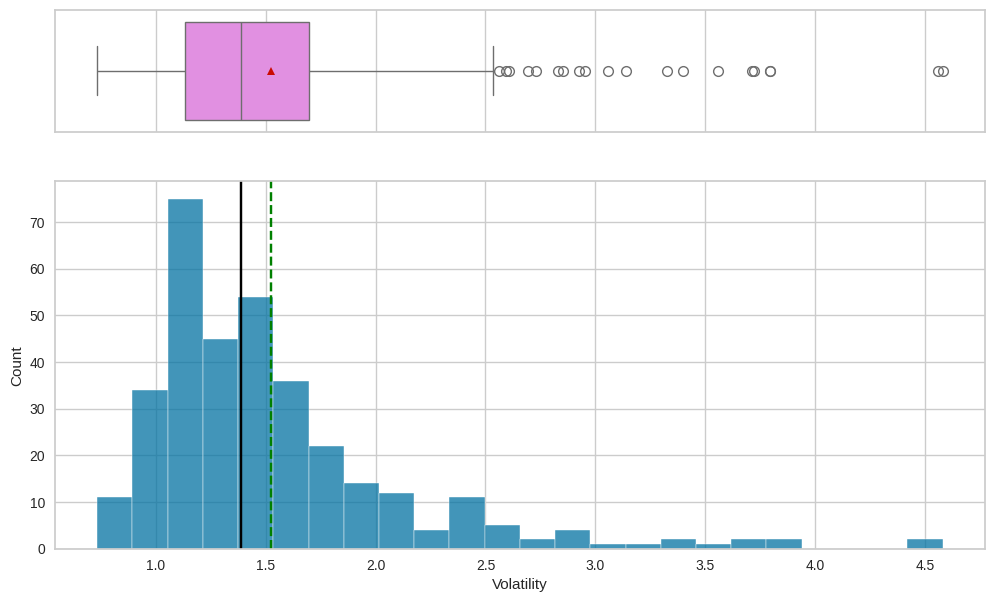

In [ ]:
histogram_boxplot(df, 'Volatility', figsize=(12, 7), kde=False, bins=None)

#### The price volatility has a right-skewed distribution with lots of outliers to the right which is similar to the distribution obtained for the current price data.

## Distribution of the ROE data

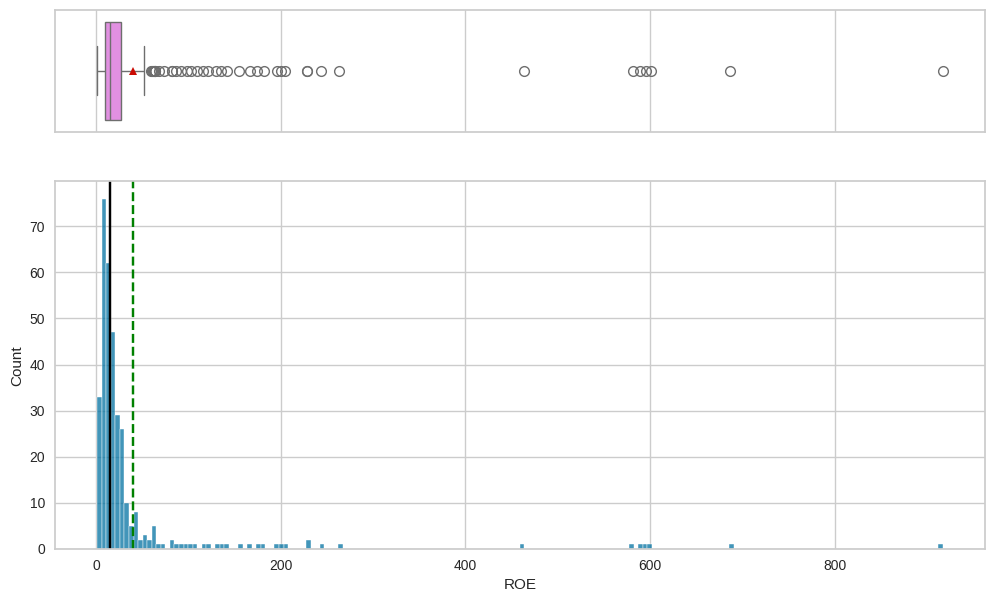

In [ ]:
histogram_boxplot(df, 'ROE', figsize=(12, 7), kde=False, bins=None)

#### The distribution of the ROE is highly skewed to the right with lots of outliers.

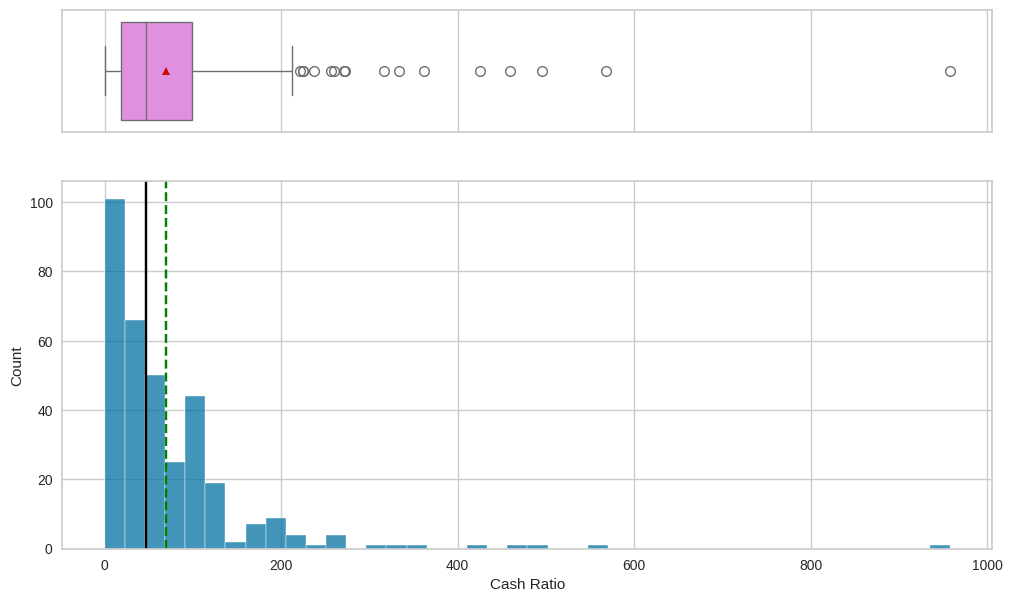

In [ ]:
histogram_boxplot(df, 'Cash Ratio', figsize=(12, 7), kde=False, bins=None)

In [ ]:
df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

## Distribution of the Net Cash Flow, Net Income, Earnings per Share, Estimated Shares Outstanding, P/E Ratio and P/B Ratio

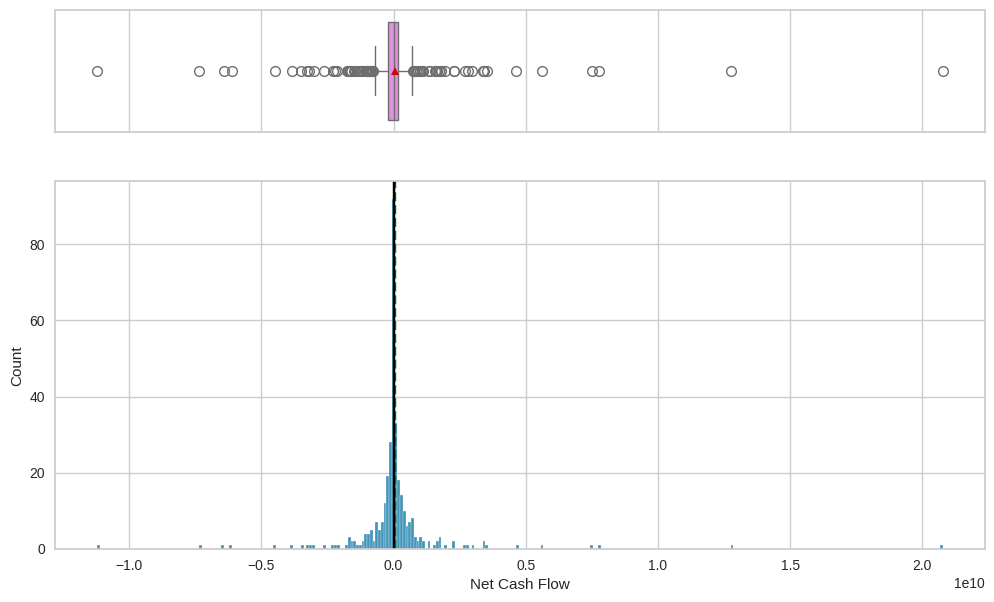

In [ ]:
histogram_boxplot(df, 'Net Cash Flow', figsize=(12, 7), kde=False, bins=None)

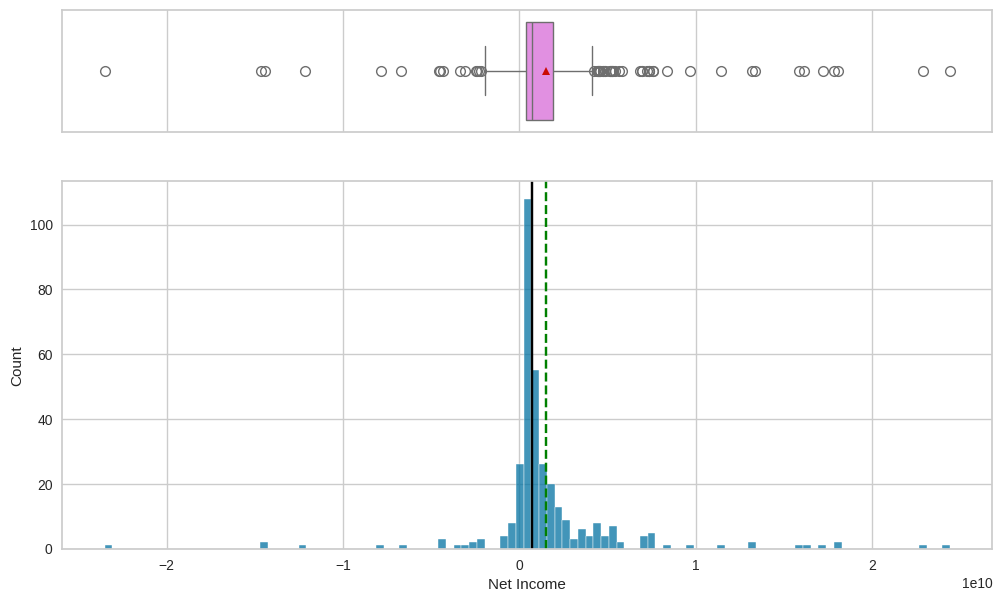

In [ ]:
histogram_boxplot(df, 'Net Income', figsize=(12, 7), kde=False, bins=None)

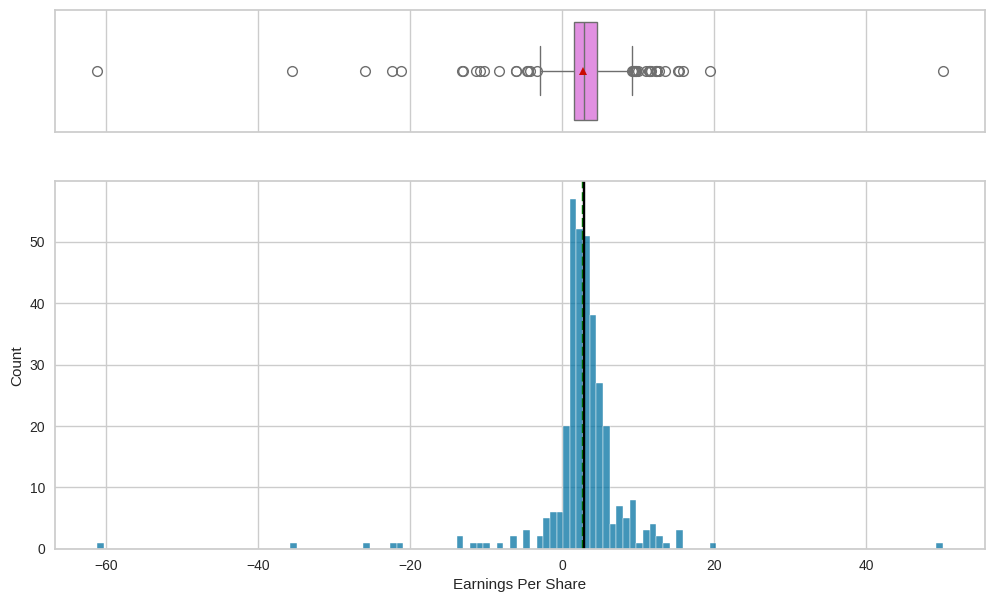

In [ ]:
histogram_boxplot(df, 'Earnings Per Share', figsize=(12, 7), kde=False, bins=None)

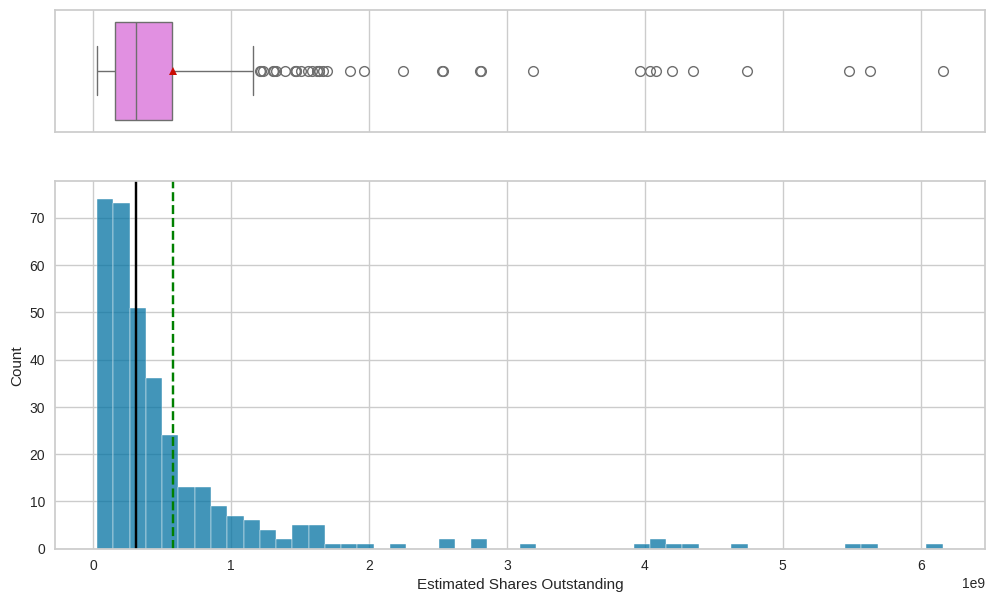

In [ ]:
histogram_boxplot(df, 'Estimated Shares Outstanding', figsize=(12, 7), kde=False, bins=None)

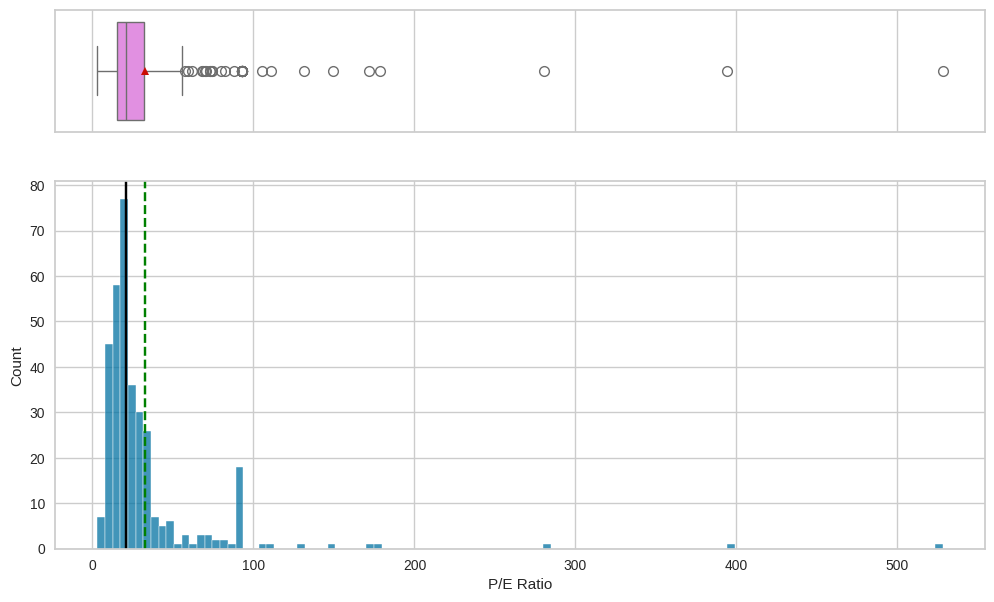

In [ ]:
histogram_boxplot(df, 'P/E Ratio', figsize=(12, 7), kde=False, bins=None)

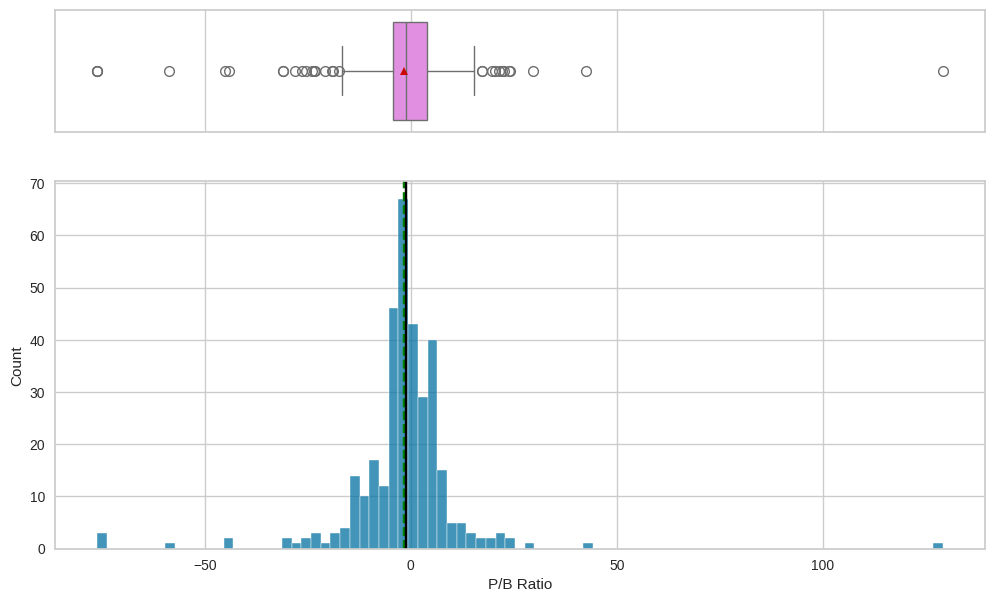

In [ ]:
histogram_boxplot(df, 'P/B Ratio', figsize=(12, 7), kde=False, bins=None)

#### It will be noted that the distribution of the P/B ratio, Net Income, Earnings Per Share and Net Cash Flow are close to normal with outliers on both the left and right side. However, for the Estimated Shares Outstanding and P/E Ratio, the distribution is right skewed with lots of outliers to the right.

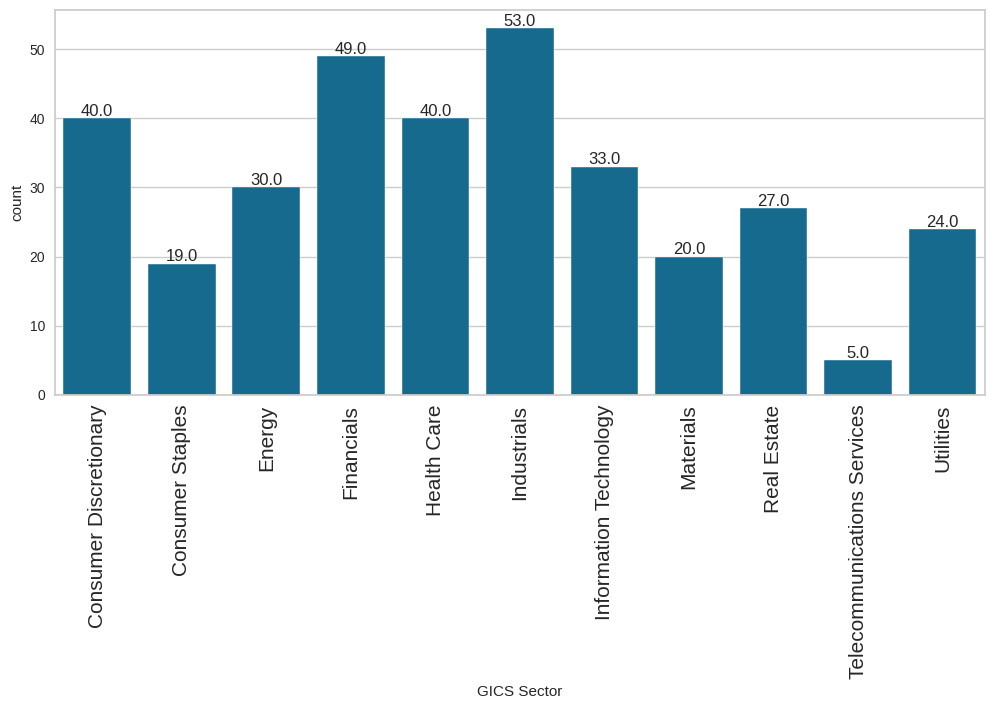

In [ ]:
# A bar plot of the GICS Sector
labeled_barplot(df, 'GICS Sector', perc=False, n=None)

## Observation
#### The industrial Sector had the highest count (53) and followed by the Financials and both Consumer Discretionary and Health Care Sectors with 49 and 40 counts respectively. The sector with the least count is the Telecommunications Services with a count of 5.

In [ ]:
#make a copy of the data
df1 = df.copy()

In [ ]:
df['GICS Sub Industry'].describe()

,GICS Sub Industry
count,340
unique,104
top,Oil & Gas Exploration & Production
freq,16


In [ ]:
df['GICS Sub Industry'].value_counts()

,count
GICS Sub Industry,
Oil & Gas Exploration & Production,16
REITs,14
Industrial Conglomerates,14
Electric Utilities,12
Internet Software & Services,12
Health Care Equipment,11
MultiUtilities,11
Banks,10
Property & Casualty Insurance,8


In [ ]:
# Getting the top 10 GICS Sub industry
df2 = df[df['GICS Sub Industry'] =='Oil & Gas Exploration & Production']
df3 = df[df['GICS Sub Industry'] =='REITs']
df4 = df[df['GICS Sub Industry'] =='Industrial Conglomerates']
df5 = df[df['GICS Sub Industry'] =='Electric Utilities']
df6 = df[df['GICS Sub Industry'] =='Internet Software & Services']
df7 = df[df['GICS Sub Industry'] =='Health Care Equipment']
df8 = df[df['GICS Sub Industry'] =='MultiUtilities']
df9 = df[df['GICS Sub Industry'] =='Banks']
df10 = df[df['GICS Sub Industry'] =='Property & Casualty Insurance']
df11 = df[df['GICS Sub Industry'] =='Diversified Financial Services']
df12 = df[df['GICS Sub Industry'] =='Biotechnology']




In [ ]:
# Grouping the top 10 GICS Sub Industry together

df13 = pd.concat([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

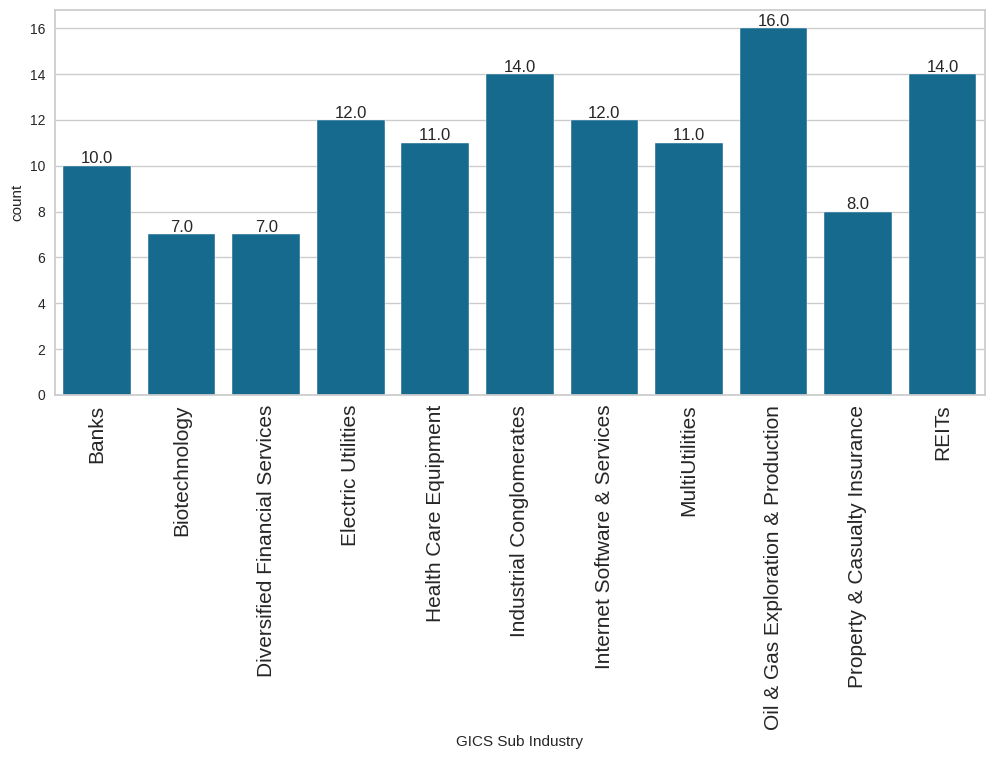

In [ ]:
# Making a plot of the top 10 GICS Sub Industry
labeled_barplot(df13, 'GICS Sub Industry', perc=False, n=None)

## Observation
#### It would be worth noting that the GICS Sub Industry had over 100 unique industries with so many industries having the same number of counts, therefore presenting such data on a bar chart will be very clumsy and the information will be difficult to read. Hence, the purpose of simplicity and ease of interpretion, the top ten (10) most occurring industries were selected and their bar plot was made. From the bar plot, it will be observed that the Oil & Gas Exploration & Production industry stock had the highest count (16) closely followed by both the Industrial Conglomerates and REITS stocks with 14 counts each. Electrical Utilities and Internet Software & Services stocks came third with a count of 12.

## Bivariate Analysis

In [3]:
# Creating a dataframe containing only the numerical variables
df_num = df.select_dtypes(include='number')
df_num

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...
335,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


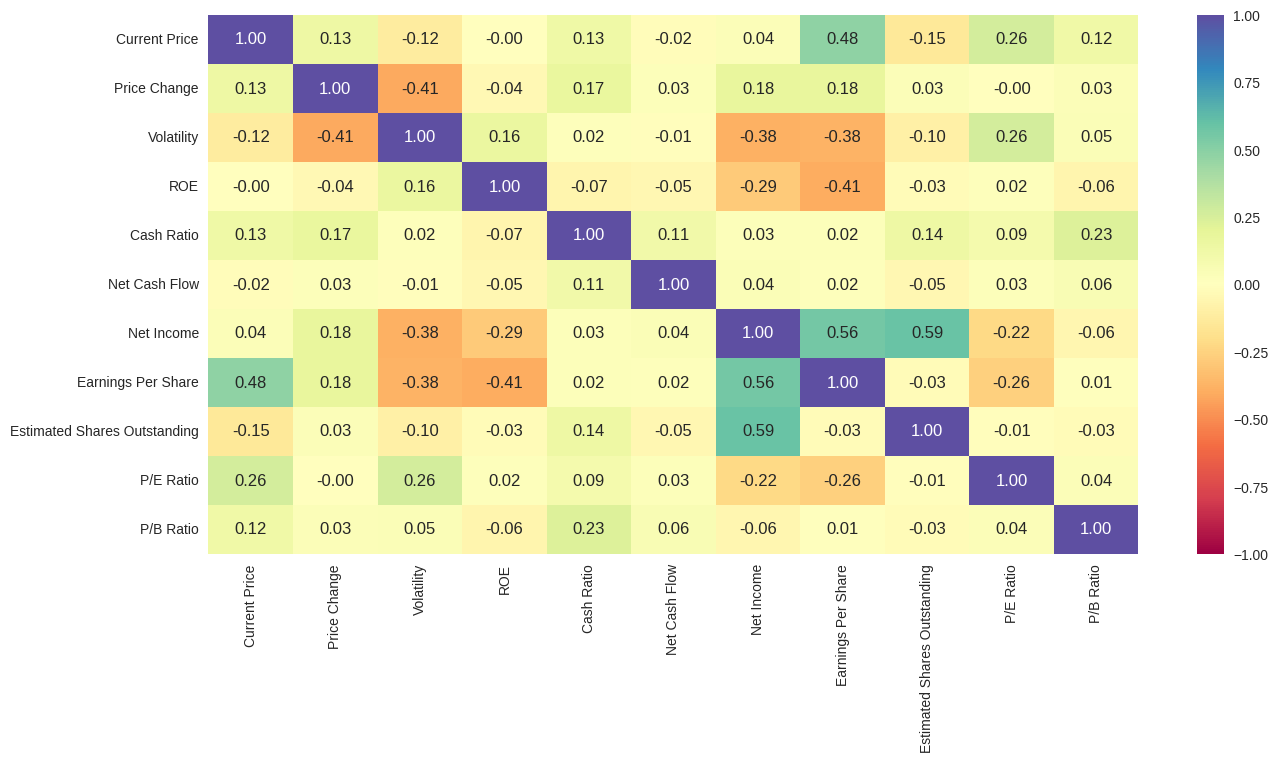

In [ ]:
# Getting the heatmap/correlation of the numerical variables

plt.figure(figsize=(15, 7))
sns.heatmap(
    df_num.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Observation
#### It will be observed that there is a significant positive correlation between the Earnings Per Share and Net Income (correlation coeff 0.56), Estimated Shares Outstanding and Net Income (Correlation coeff 0.59) and Earnings Per Share and Current Price (Correlation coeff 0.48). However, there is a significant negative correlation between Earnings Per Share and ROE (Correlation coeff -0.41), Net Income and Volatility (Correlation coeff -0.38) and Earnings Per Share and Volatility (Correlation coeff -0.38).

## Analysis of stocks with the maximum price increase for the different economic sectors

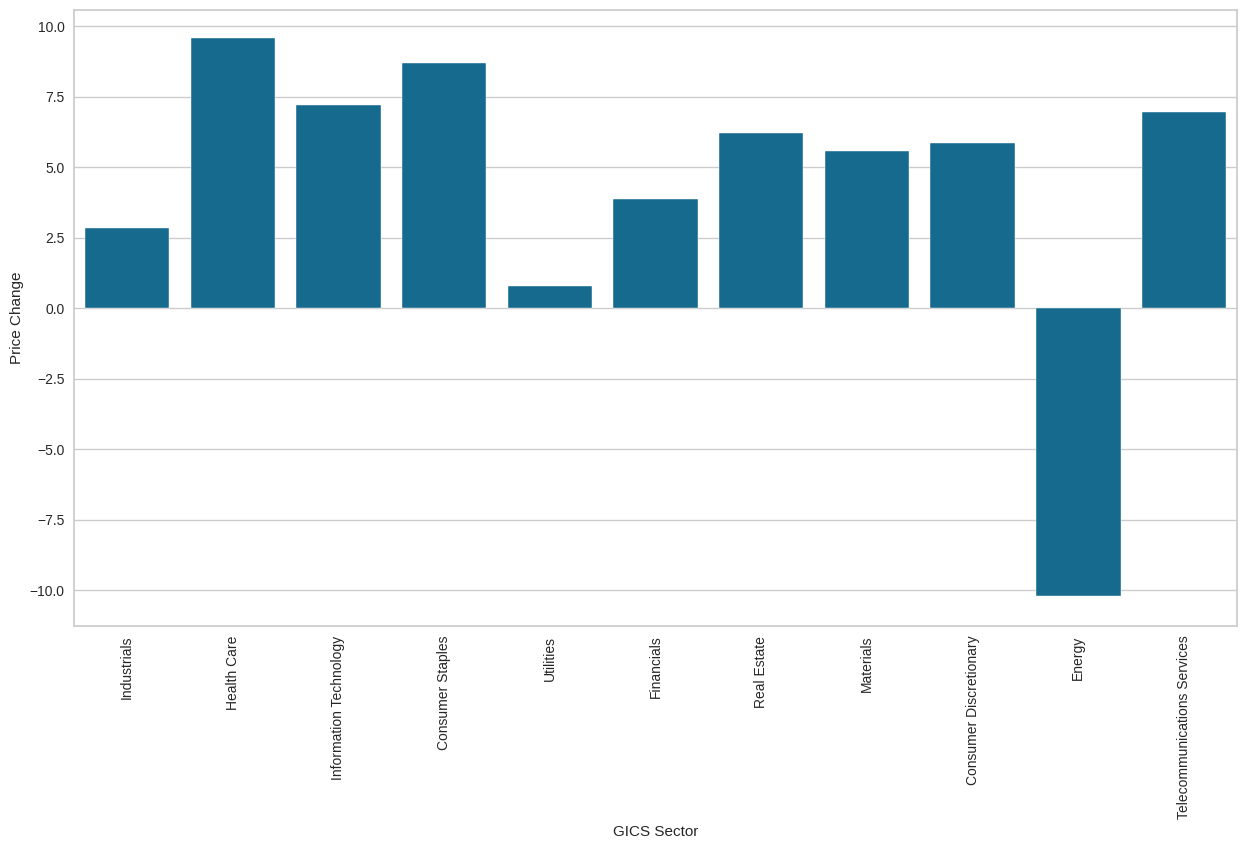

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

## Observation
#### It will be noted that within the 13 weeks observation window, the Health Care stocks had the highest positive change in price (about 9%), meaning that there was a price increase for the stocks. The next is the Consumer Staples stocks with about 8% price increase closely followed by Real Estate stocks with about 6% price increase. However, only the Energy stocks experienced a price decrease of about -10% in its price.

## Analysis of the Cash Ratio across the various economic sectors

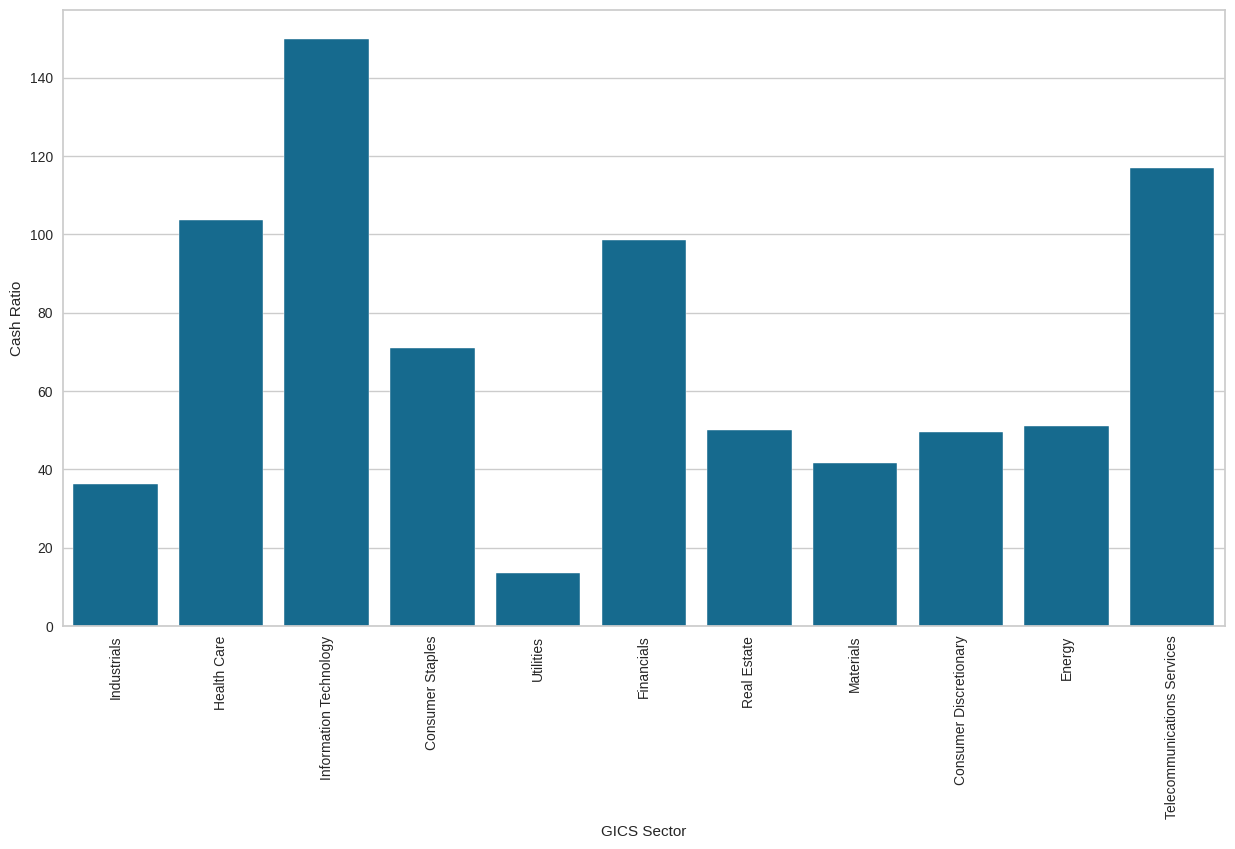

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

## Observation
#### The Information Technology economic sector had the highest Cash Ratio of about 150 which means that it had the highest ability to meet its current obligation with cash or other cash equivalent. The next is the Health care sector with a Cash Ratio of about 105 followed by Financials sector with a Cash Ratio of about 98. The Utilities sector had the lowest Cash Ratio of about 12.

## Analysis of P/E across the different economic sectors

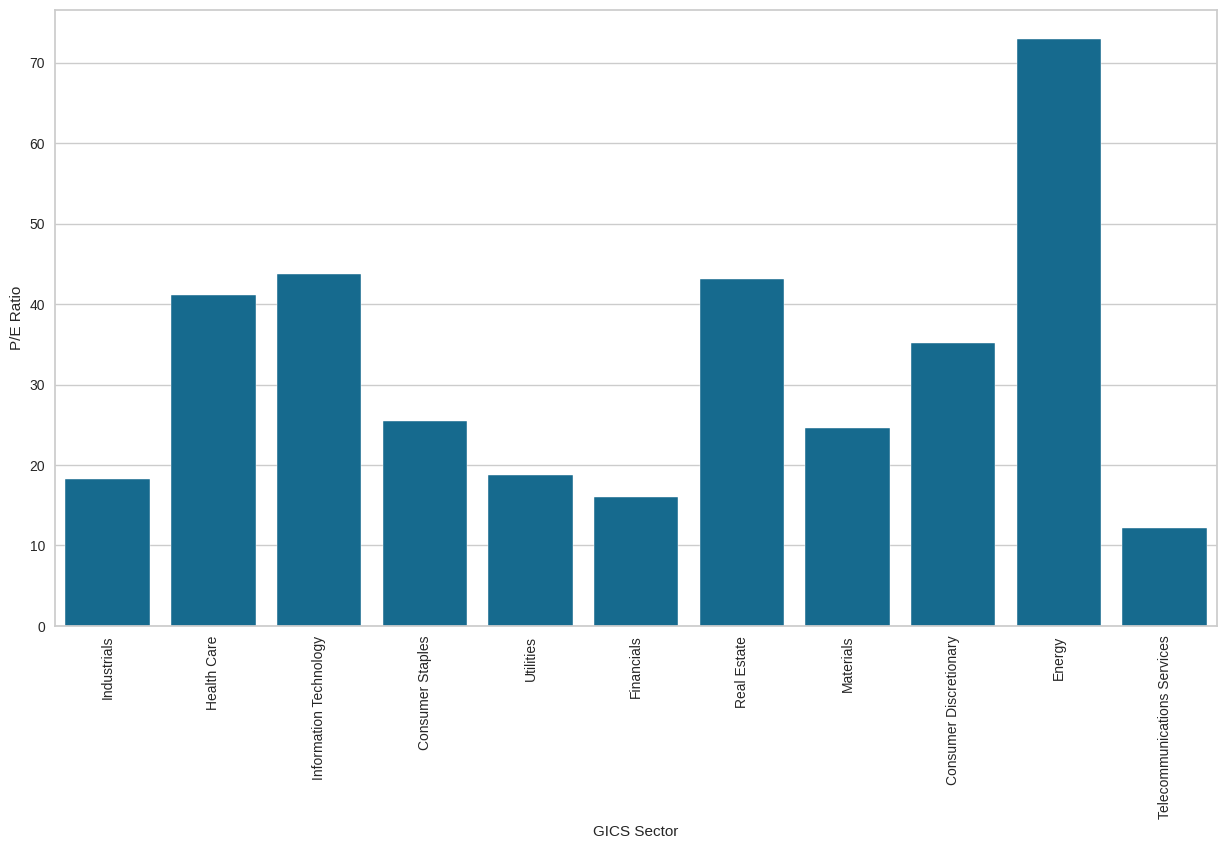

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

## Observation
#### The Energy sector had stocks with the highest P/E ratio of about 74 closely followed by Information Technology and Real Estate sectors had stocks with a P/E ratio of 44 and 43 respectively. Telecommunication Services sector had stocks with the lowest P/E ratio

## Analysis of the Volatility across the different economic sectors

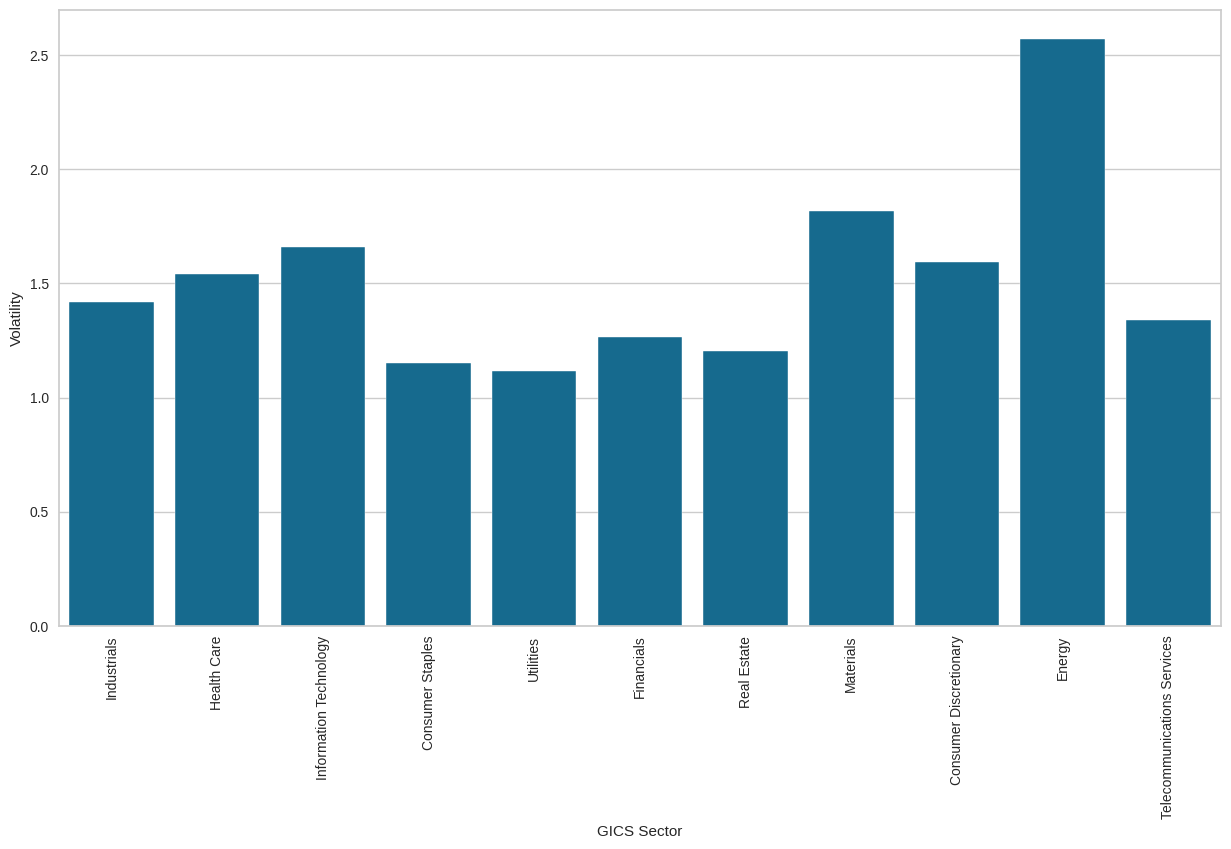

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

## Observation
#### It will be noted that the Energy stocks had the highest Volatility of about 27 which made it the riskiest stock to invest in  followed by the Materials and Information Technology stocks. The Utilities and Consumer Staples stocks had the lowest Volatility.

## Analysis of the Earnings Per Share for the stocks across the different Economic Sectors

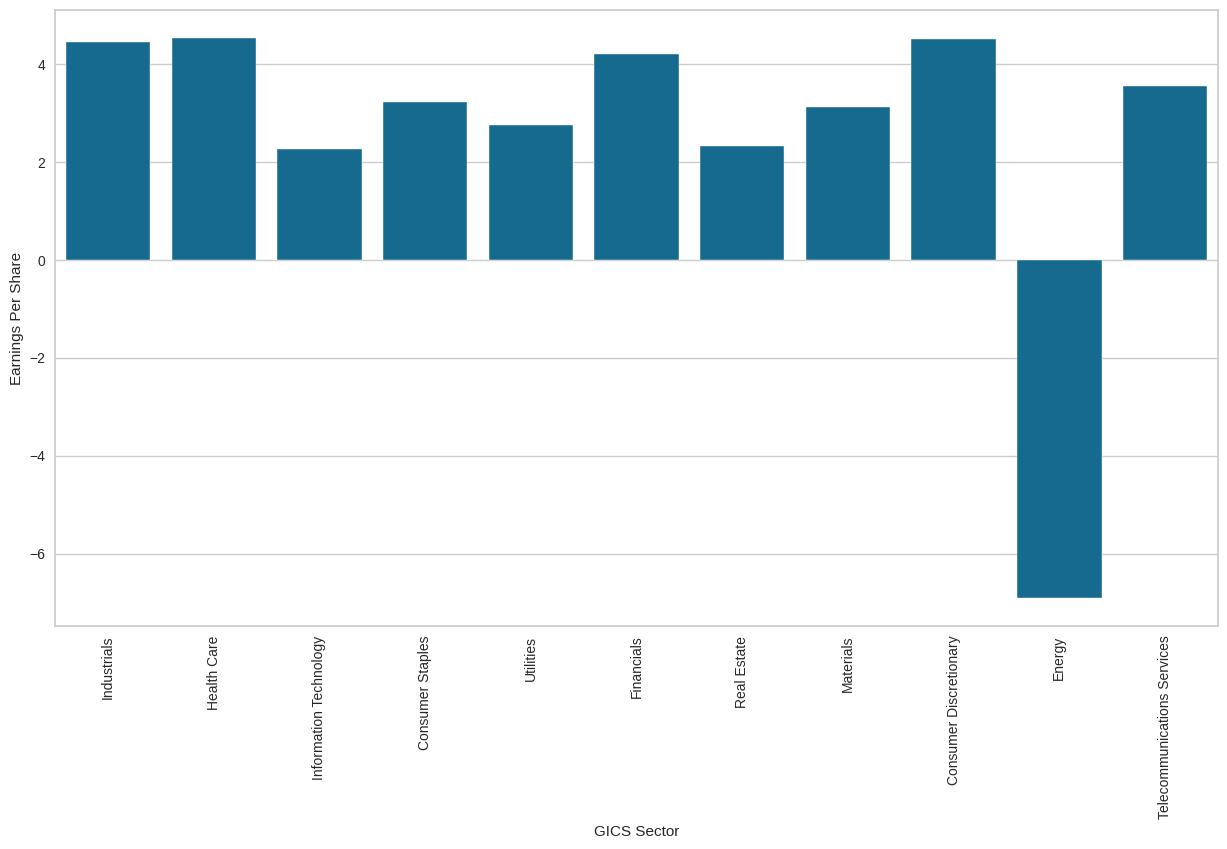

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df, x='GICS Sector', y='Earnings Per Share', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

## Observation
#### Consumer Discretionary stocks had the highest Earning Per Share closely followed by the Industrials and Health Care stocks. But only the Energy stocks had a negative Earnings Per Share compared to other stocks which suggest that it is a risky stock to invest in.

## Data Preprocessing

## Outlier checks

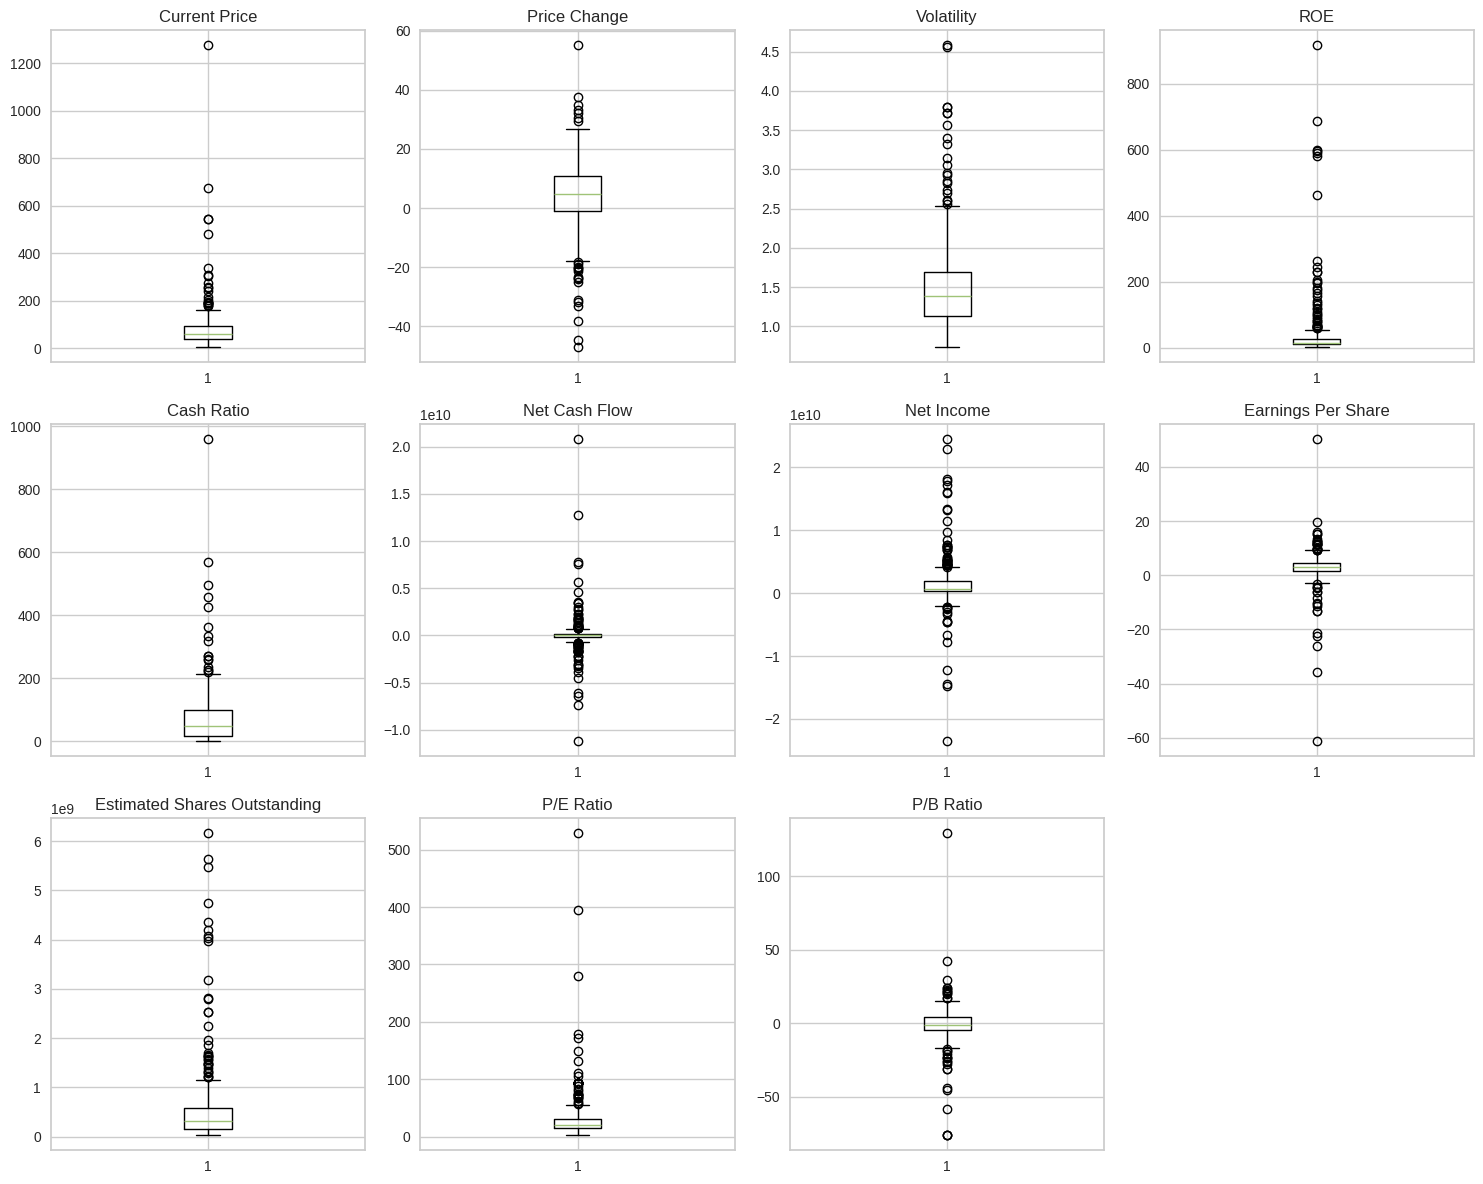

In [ ]:
# Checking for outliers in the numerical features
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observation
#### It will be observed that all the numerical features had lots of outliers predominantly skewed to the right of the boxplot while in some cases, the outliers appeared in both the left and right hand side of the boxplot. However, since this use case involves the stocks whose price and other characteristics experience significant variability, the outliers will not be treated but rather taken as normal behaviour of the stocks.

## Scaling of data

In [4]:
#Scaling the data
sc = StandardScaler()
df_scaled = sc.fit_transform(df_num)
#converting the scaled data to a dataframe
df_scaled_df = pd.DataFrame(df_scaled, columns=df_num.columns)
df_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-Means Clustering

In [5]:
# Make another copy of the scaled data
df_scaled_new =df_scaled_df.copy()

In [6]:
# Determining the different clusters using the K-Means clustering method
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    prediction = model.fit_predict(df_scaled_new)
    distortion = (
        sum(np.min(cdist(df_scaled_new, model.cluster_centers_, "euclidean"), axis=1))
        / df_scaled_new.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025
Number of Clusters: 10 	Average Distortion: 1.9360473996664198
Number of Clusters: 11 	Average Distortion: 1.8615942883461607
Number of Clusters: 12 	Average Distortion: 1.8219574388532505
Number of Clusters: 13 	Average Distortion: 1.7936924742607907
Number of Clusters: 14 	Average Distortion: 1.7567842179093438


## Using the Elbow Method to determine the number of clusters

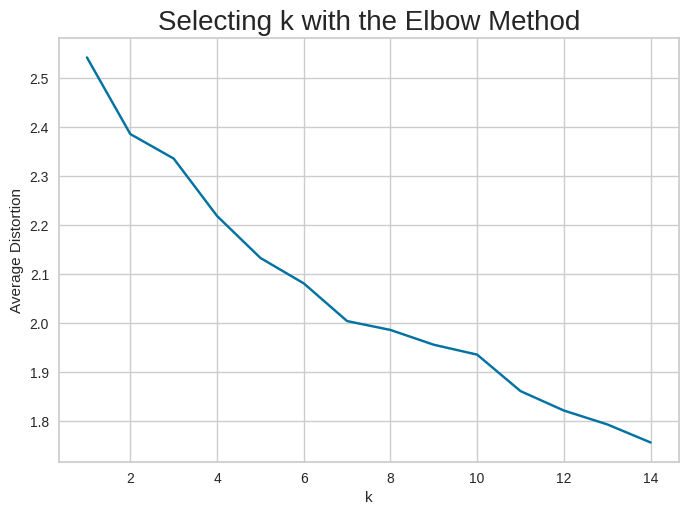

In [7]:
# Codes to plot the elbow curve
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

## Observation
#### It will be noticed that there is no clear instance on the curve where the change in the average distortion is minimum because there are multiple kinks on the curve. Hence, another method where the attribute of the KMeans called inertia which minimizes the intra-cluster sum of square distance will be used. however, it will be noticed that at k = 7, the average distortion was minimal.





In [8]:
# Inertia Method
clusters = range(1, 15)
SSD = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_scaled_new)
    prediction = model.predict(df_scaled_new)
    distortion = model.inertia_
    SSD.append(distortion)

    print("Number of Clusters:", k, "\tSum of Squared Distortion:", distortion)




Number of Clusters: 1 	Sum of Squared Distortion: 3740.0000000000014
Number of Clusters: 2 	Sum of Squared Distortion: 3255.019911353368
Number of Clusters: 3 	Sum of Squared Distortion: 3036.2722942382948
Number of Clusters: 4 	Sum of Squared Distortion: 2685.7742066146407
Number of Clusters: 5 	Sum of Squared Distortion: 2426.0152657475123
Number of Clusters: 6 	Sum of Squared Distortion: 2221.116832723935
Number of Clusters: 7 	Sum of Squared Distortion: 2103.713526426531
Number of Clusters: 8 	Sum of Squared Distortion: 1912.0301023385432
Number of Clusters: 9 	Sum of Squared Distortion: 1851.4372557185366
Number of Clusters: 10 	Sum of Squared Distortion: 1797.9547900179632
Number of Clusters: 11 	Sum of Squared Distortion: 1678.842646305452
Number of Clusters: 12 	Sum of Squared Distortion: 1564.7181451708975
Number of Clusters: 13 	Sum of Squared Distortion: 1517.1067817629637
Number of Clusters: 14 	Sum of Squared Distortion: 1364.511312893312


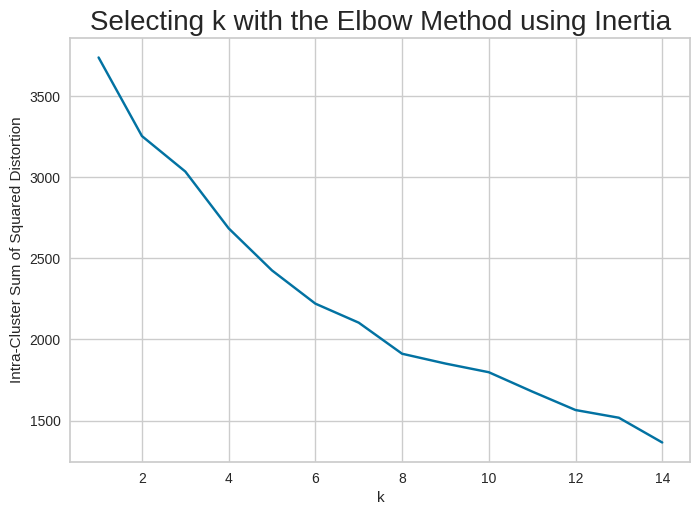

In [9]:
# Codes to plot the elbow curve
plt.plot(clusters, SSD, "bx-")
plt.xlabel("k")
plt.ylabel("Intra-Cluster Sum of Squared Distortion")
plt.title("Selecting k with the Elbow Method using Inertia", fontsize=20)
plt.show()

## Observation
#### On using this method, it will be observed that at k = 8, the change in the  intra-cluster sum of squared distances is minimum, hence the optimum cluster k = 8 will be selected. Also, k = 6 and k = 7 will be be tested as well.

## Obtaining the Silhouette Score

For n_clusters = 2, silhouette score is 0.3037861779045894
For n_clusters = 3, silhouette score is 0.4357415975612793
For n_clusters = 4, silhouette score is 0.22799730473163865
For n_clusters = 5, silhouette score is 0.43213336176547695
For n_clusters = 6, silhouette score is 0.13971660660220836
For n_clusters = 7, silhouette score is 0.33697790523611654
For n_clusters = 8, silhouette score is 0.4017210544065337
For n_clusters = 9, silhouette score is 0.19805960366647404
For n_clusters = 10, silhouette score is 0.3423989415543674
For n_clusters = 11, silhouette score is 0.16308279228104153
For n_clusters = 12, silhouette score is 0.12796795517110637
For n_clusters = 13, silhouette score is 0.1491915281735529
For n_clusters = 14, silhouette score is 0.1264980410495611


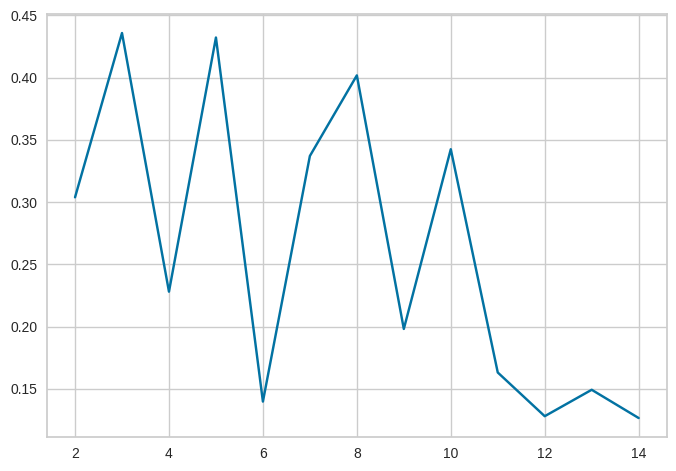

In [10]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_scaled_new))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_scaled_new, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

#### From the plot, it will be observed that the Silhouette scoree are high when the number of clusters k = 3, k = 4, k = 5, k = 6, k = 7,  k = 8 and k = 9.

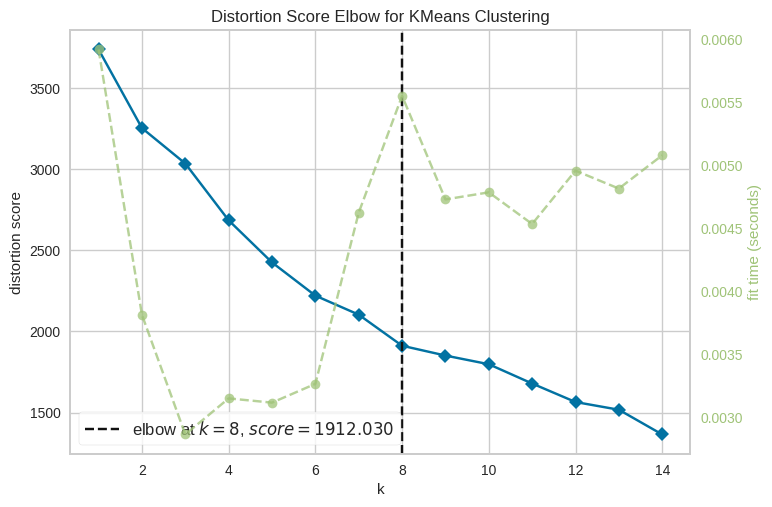

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(df_scaled_new)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

#### From the plot, it will be observed that the optimum cluster will be obtained at the point of intersection of the curves, i.e. when k = 7 approximately.

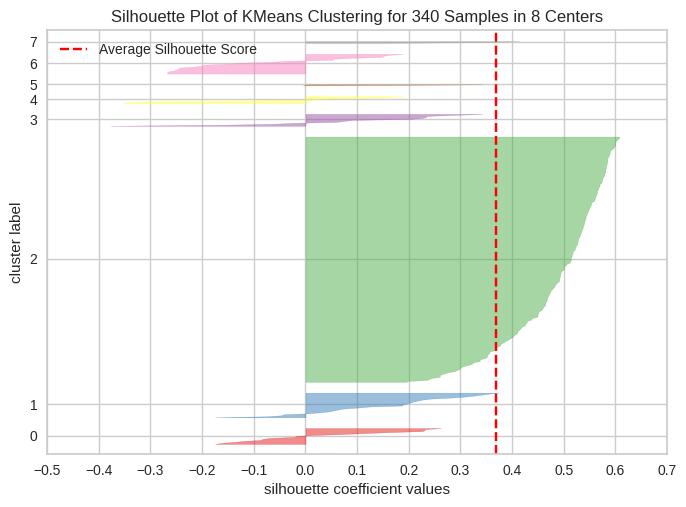

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))  ##  code to visualize the silhouette scores for certain number of clusters
visualizer.fit(df_scaled_new)
visualizer.show()

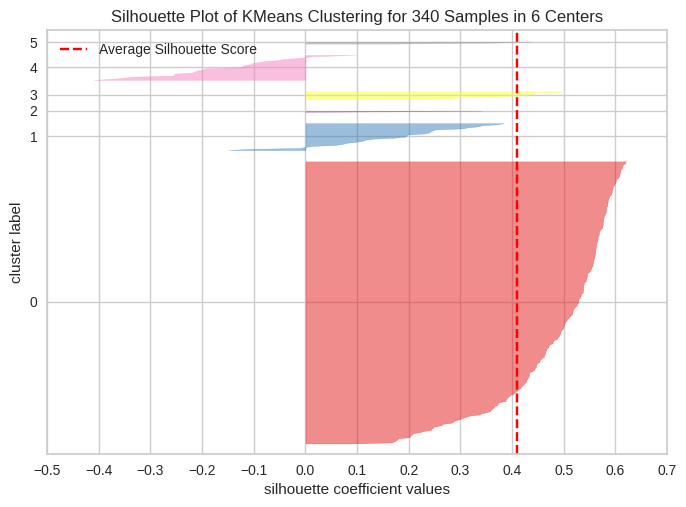

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ##  code to visualize the silhouette scores for certain number of clusters
visualizer.fit(df_scaled_new)
visualizer.show()

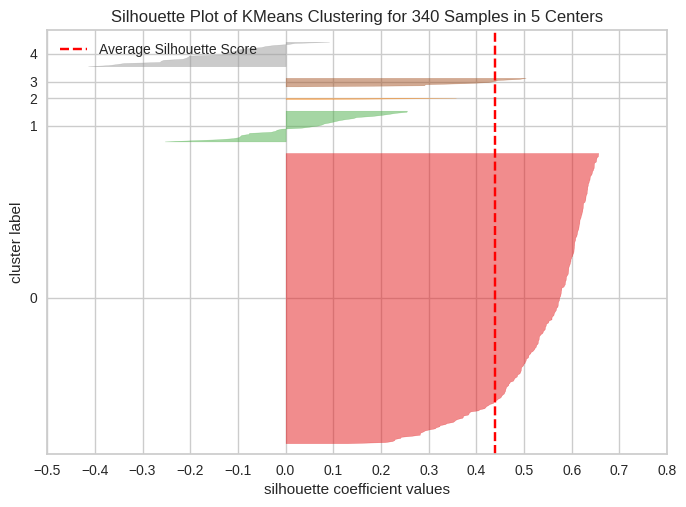

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ##  code to visualize the silhouette scores for certain number of clusters
visualizer.fit(df_scaled_new)
visualizer.show()

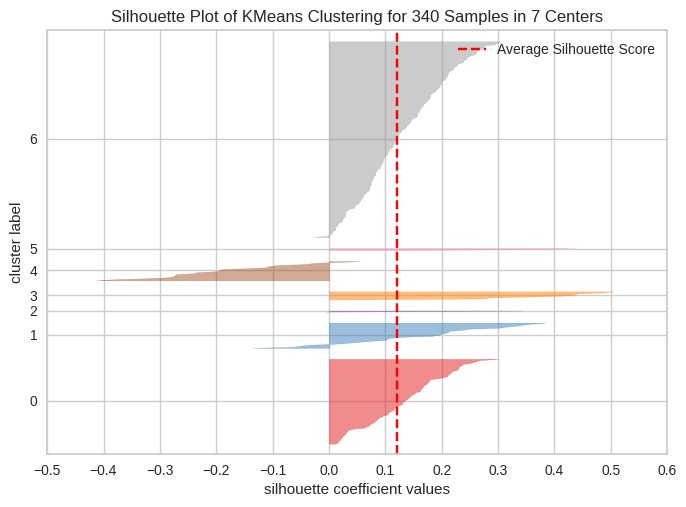

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))  ##  code to visualize the silhouette scores for certain number of clusters
visualizer.fit(df_scaled_new)
visualizer.show()

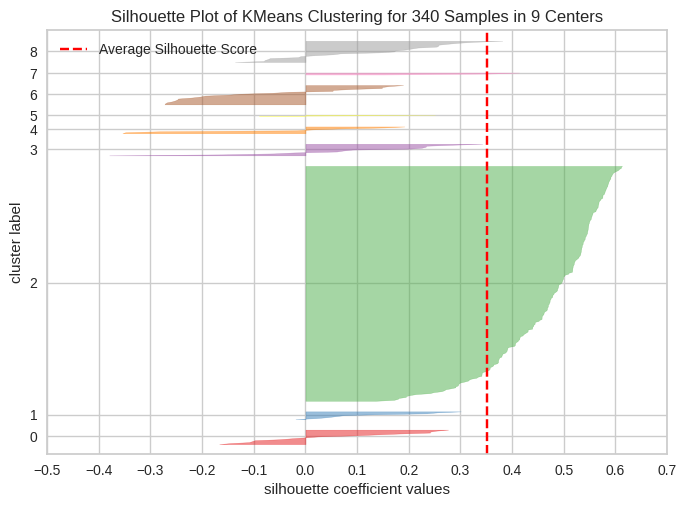

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))  ##  code to visualize the silhouette scores for certain number of clusters
visualizer.fit(df_scaled_new)
visualizer.show()

## Observation
#### The Silhouette plots for k = 5, k = 6, k = 6, k = 7, k = 8 and k = 9 were made and it was observed that only Silhouette plot when k = 7 gave a reasonable size of clusters and they all crossed the average line. However, for the remaining silhouette plots, it was noted that one cluster contained majority of the data with the remaining clusters only having very few data. Therefore the optimal number of clusters selected based on the silhouette plot will be  k = 7

## Creating the final model

In [11]:
# final K-means model
kmeans = KMeans(n_clusters= 7, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(df_scaled_new)

# Make a copy of the data
df_new = df_num.copy()
df_new1 = df.copy()

In [12]:
# adding kmeans cluster labels to the original and scaled dataframes
df_scaled_new["KM_Clusters"] = kmeans.labels_
df_new["KM_Clusters"] = kmeans.labels_
df_new1["KM_Clusters"] = kmeans.labels_
df_new1.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_Clusters
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,6
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,4


## Cluster Profiling

In [13]:
km_cluster_profile = df_new.groupby("KM_Clusters").mean()  ## code to groupby the cluster labels

In [14]:
km_cluster_profile["count_in_each_segment"] = (
    df_new.groupby("KM_Clusters")["Net Income"].count().values  ##  code to groupby the cluster labels
)
km_cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_Clusters,,,,,,,,,,,,
0,56.440339,13.895538,1.658283,24.917647,79.400000,-2.134252e+08,1.238238e+09,2.584824,5.770735e+08,25.616341,2.137045,85
1,35.263847,-16.175693,2.841300,49.769231,48.153846,-1.352150e+08,-2.525946e+09,-6.514231,4.824285e+08,77.817252,1.618150,26
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141,2
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3.040667e+09,1.484844e+10,3.435556,4.564960e+09,15.596051,-6.354193,9
4,234.901664,7.211891,1.545757,23.700000,296.000000,2.659468e+09,3.361251e+09,7.761500,9.590740e+08,45.209962,16.532309,20
5,327.006671,21.917380,2.029752,4.000000,106.000000,6.982407e+08,2.875470e+08,0.750000,3.667632e+08,400.989188,-5.322376,3
6,80.158129,2.032042,1.283693,39.671795,45.856410,7.798178e+07,1.564125e+09,4.045923,3.702035e+08,23.172336,-5.479729,195


In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_Clusters,,,,,,,,,,,,
0,56.799020,6.951189,1.326137,24.588235,232.352941,-555763117.647059,10027089941.176470,3.250000,3304651273.782353,29.872963,-0.443998,17
1,95.256510,2.055079,1.299885,25.673267,55.960396,256789990.099010,1643411113.861386,4.515421,368953974.003515,24.162546,-3.481603,202
2,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1
3,34.124445,-16.987771,2.904949,73.370370,47.185185,-251799666.666667,-2976281481.481482,-7.103704,488809088.875556,75.987277,1.490051,27
4,56.440339,13.895538,1.658283,24.917647,79.400000,-213425235.294118,1238238235.294118,2.584824,577073477.586118,25.616341,2.137045,85
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
6,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df_new1["KM_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_new1[df_new1["KM_Clusters"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'Apartment Investment & Mgmt' 'Assurant Inc'
 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Boston Properties'
 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.'
 'CF Industries Holdings Inc' 'Church & Dwight' 'C. H. Robinson Worldwide'
 'CIGNA Corp.' 'Cincinnati Financial' 'Comerica Inc.' 'CME Group Inc.'
 'Chipotle Mexican Grill' 'Cummins Inc.' 'CMS Energy' 'CenterPoint Energy

In [ ]:
df_new1.groupby(["KM_Clusters", "GICS Sector"])['Security'].count()

KM_Clusters  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     5
             Information Technology          4
             Telecommunications Services     1
1            Consumer Discretionary         25
             Consumer Staples               12
             Energy                          1
             Financials                     35
             Health Care                    18
             Industrials                    38
             Information Technology          8
             Materials                       9
             Real Estate                    25
             Telecommunications Services     1
             Utilities                      24
2            Energy                          1
3            Consumer Discretionary         12
             Consumer Staples                5
             Energy                          4
             Financials                     10
             Health Care                    15
             Industrials                    14
             Information Technology         18
             Materials                       9
             Real Estate                     2
             Telecommunications Services     1
4            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
5            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
6            Energy                         22
             Industrials                     1
             Information Technology          2
             Materials                       2
Name: Security, dtype: int64

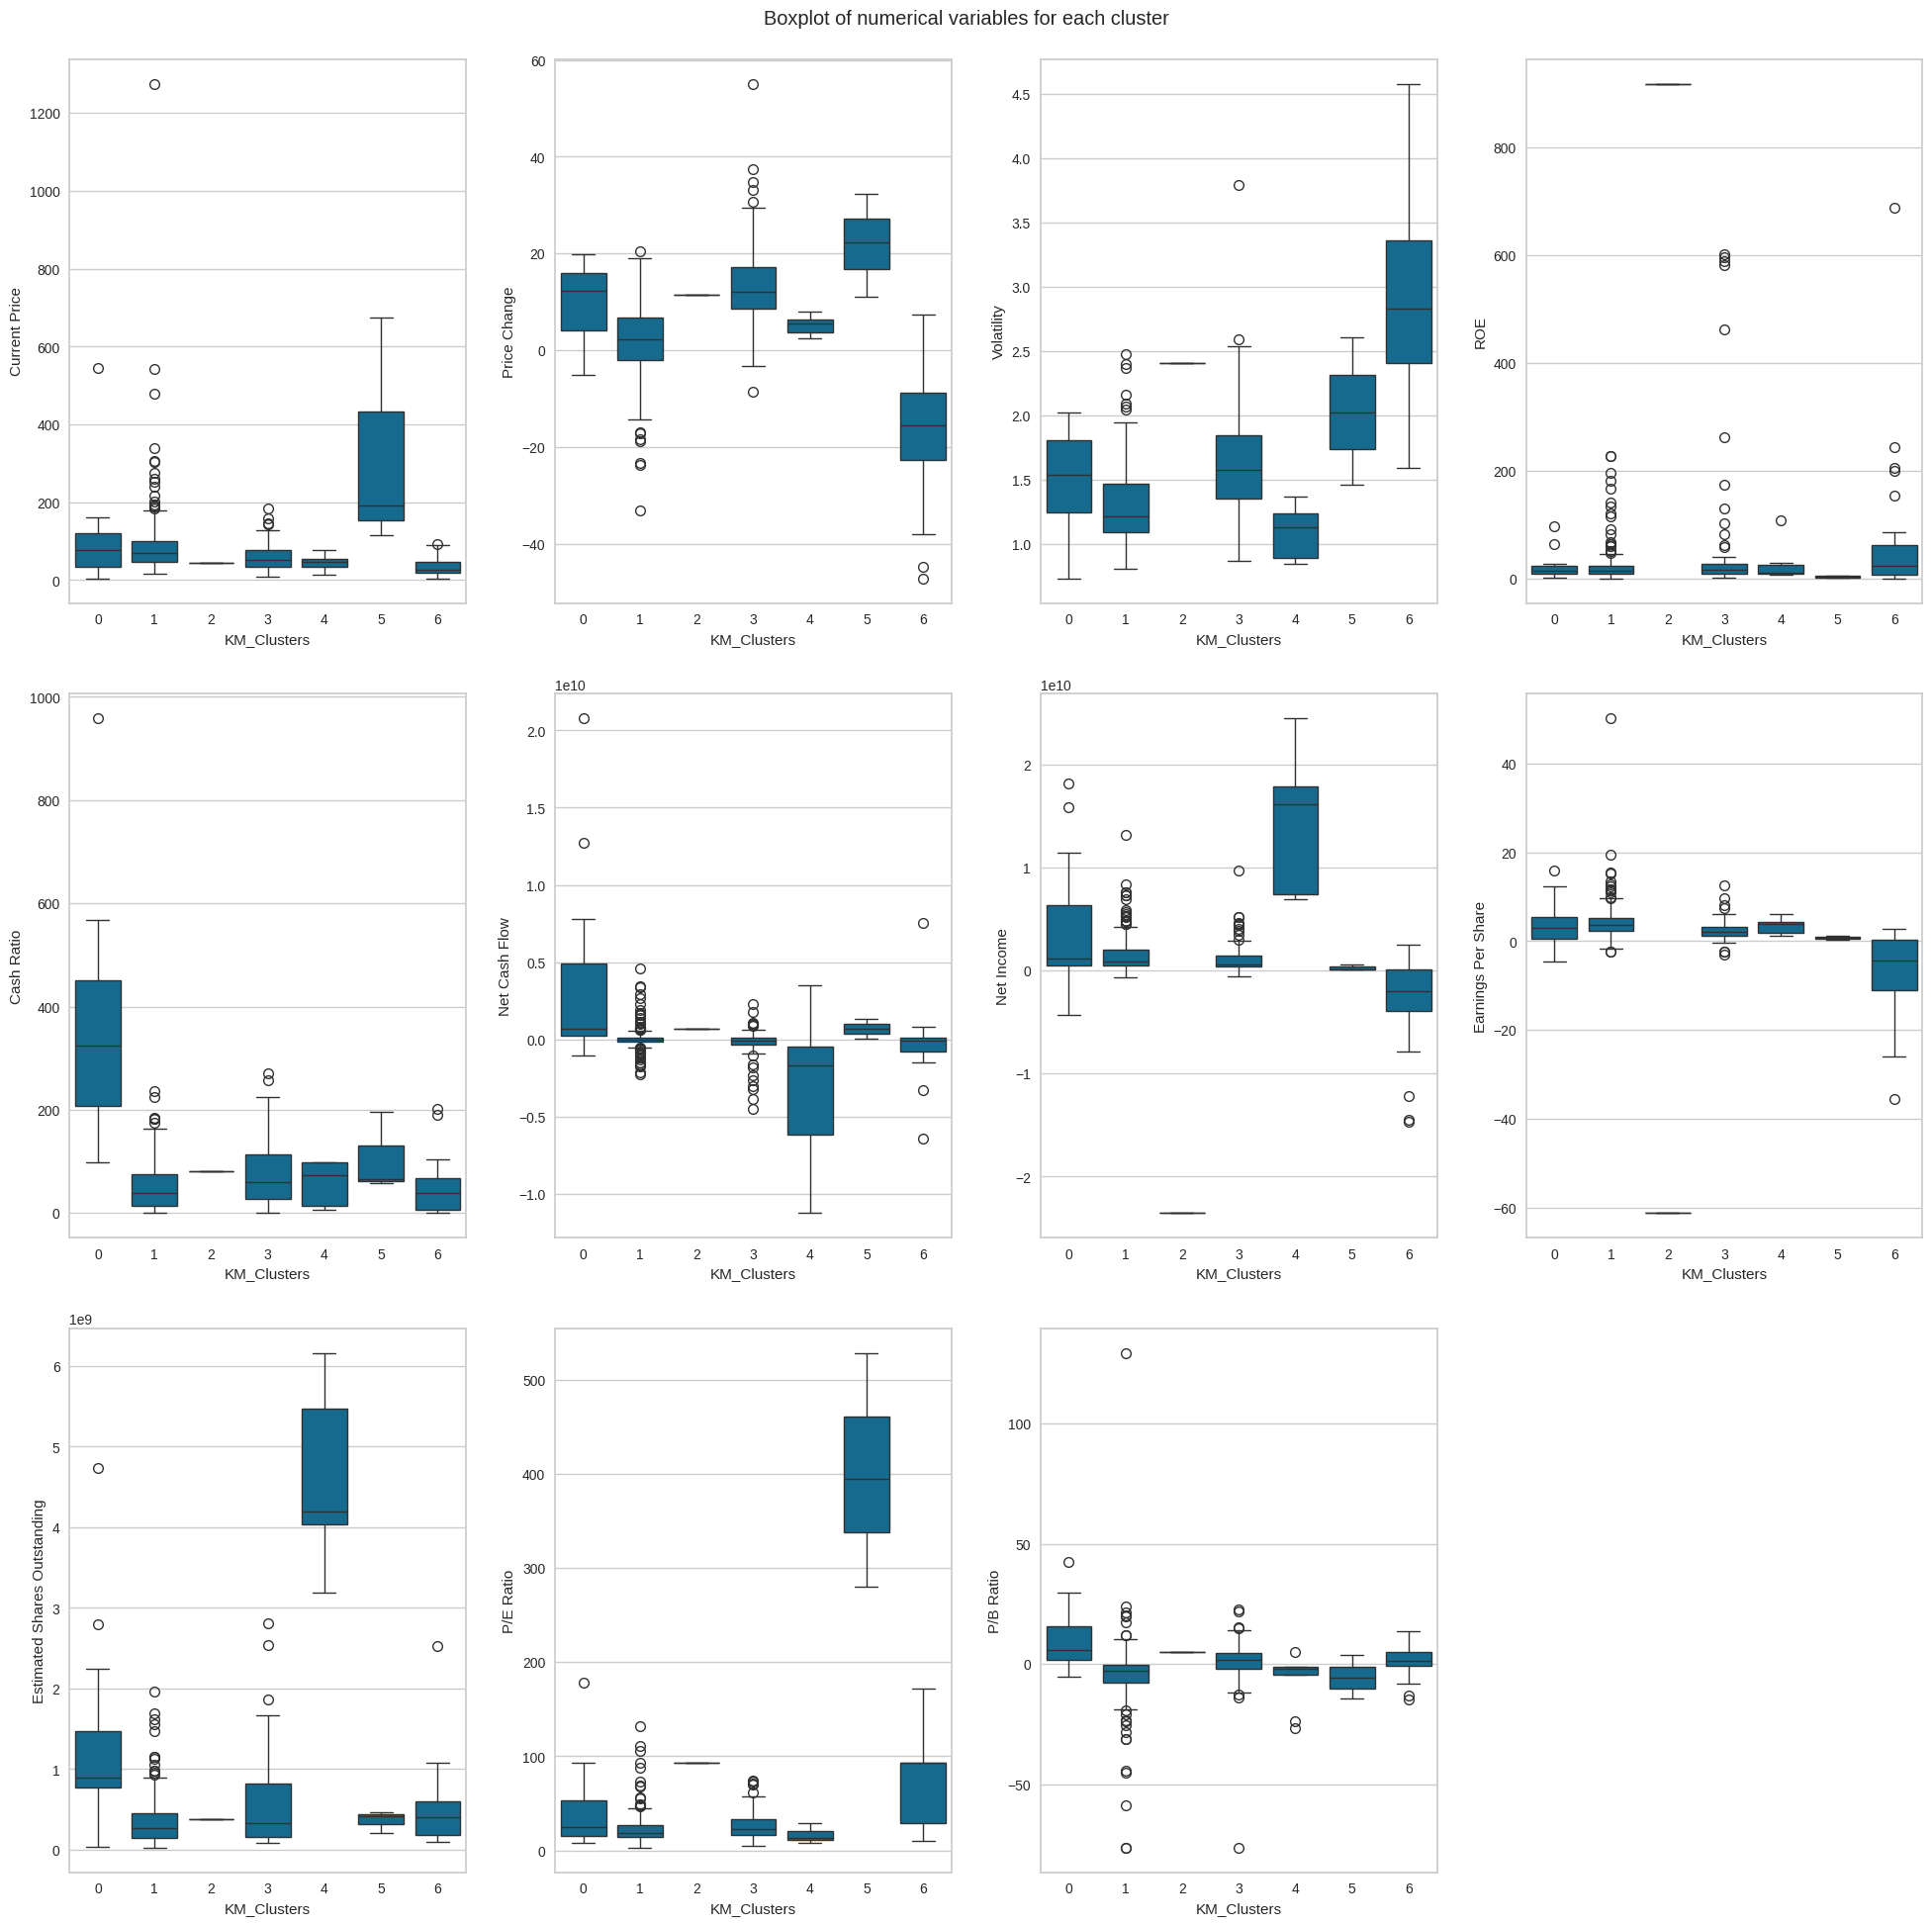

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_new1, x="KM_Clusters", y=variable)

plt.tight_layout(pad=2.0)


## Characteristics of the stocks in the different clusters

**Cluster 0**
  -	Medium current price
  -	Medium price change
  -	Medium Volatility
  -	Low ROE
  -	High Cash Ratio
  -	High Cash Flow
  -	Medium Net Income
  -	Medium Earnings Per Share
  -	Medium Estimated Share Outstanding
  -	Low P/E ratio
  -	High P/B ratio

**Cluster 1**
  -	Medium current price
  -	Low price change
  -	Low Volatility
  -	Low ROE
  -	Low Cash Ratio
  -	Medium Cash Flow
  -	Medium Net Income
  -	Medium Earnings Per Share
  -	low Estimated Share Outstanding
  -	Low P/E ratio
  -	Low  P/B ratio

**Cluster 2**
  -	Low current price
  -	Medium price change
  -	High Volatility
  -	No ROE
  -	Medium Cash Ratio
  -	Medium Cash Flow
  -	Very Low Net Income
  -	Very Low Earnings Per Share
  -	low Estimated Share Outstanding
  -	Medium P/E ratio
  -	High P/B ratio

**Cluster 3**
  -	Low current price
  -	Medium price change
  -	Medium Volatility
  -	Low ROE
  -	Medium Cash Ratio
  -	Medium Cash Flow
  -	Medium Net Income
  -	Medium Earnings Per Share
  -	low Estimated Share Outstanding
  -	Low P/E ratio
  -	Medium P/B ratio

**Cluster 4**
  -	Low current price
  -	Low price change
  -	Very Low Volatility
  -	Low ROE
  -	Medium Cash Ratio
  -	Low Cash Flow
  -	High Net Income
  -	Medium Earnings Per Share
  -	High Estimated Share Outstanding
  -	Low P/E ratio
  -	Low  P/B ratio

**Cluster 5**
  -	High current price
  -	High price change
  -	High Volatility
  -	Low ROE
  -	Medium Cash Ratio
  -	Medium Cash Flow
  -	Medium Net Income
  -	Medium Earnings Per Share
  -	low Estimated Share Outstanding
  -	High P/E ratio
  -	Low  P/B ratio

**Cluster 6**
  -	Low current price
  -	Very Low price change
  -	Very High Volatility
  -	High ROE
  -	Low Cash Ratio
  -	Medium Cash Flow
  -	Low Net Income
  -	Low Earnings Per Share
  -	low Estimated Share Outstanding
  -	Medium P/E ratio
  -	Medium P/B ratio



## Business Insights

- Stocks in clusters 0 and 1 can be grouped as category 1 stocks because they are stocks that are not very expensive and not very cheap either but such stocks have a reasonably good earnings per share which means that shareholders can still make good profit from such stocks. However stocks in cluster 1 will be recommended for long term investment since the volatility and price change for the stocks are low.

- Stocks in cluster 2 can be grouped as category 2 stocks since such stocks are highly volatile in their price and very low earnings per share. Although the price of the stocks are low but investors may not have sufficient confidence in them to make profit.

- Stocks in clusters 3, and 6 can be grouped as category 3 stocks since they are very cheap in terms of their price and they yield a resonably good earnings per share. Infact most investors will go for such stocks due to their low price and their potential to yield high return. However stocks in cluster 4 can be recommended for long time investment since their price change is low and the price volatility is very low while stocks in clusters 3 and 6 can be recommended for short term investment due to their high price volatility.

- Stocks in cluster 5 can be grouped as category 4 stocks since they are very expensive with a very high volatility in price and an average earning per share. Such stocks are recommended for short term investors.

## Hierarchical Clustering

## Calculating the cophenetic correlation

In [15]:
# Make a copy of the scaled dataframe
df_scaled_new1 = df_scaled_df.copy()
df_scaled_new1

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
...,...,...,...,...,...,...,...,...,...,...,...
335,-0.486181,0.901646,0.540121,-0.255142,4.308162,-0.559673,-1.487784,-1.127481,0.429111,-0.082116,0.572194
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.167741,-0.337154,-0.152012
337,0.221913,0.439539,-0.206067,-0.400362,0.332009,0.164889,-0.342467,-0.303532,-0.460058,2.233634,-1.589390
338,-0.547053,-0.436811,-0.097813,-0.369243,0.320933,-0.051022,-0.301171,-0.239684,-0.377852,-0.222714,0.118680


In [16]:
# list of distance metrics
distance_metrics = ["euclidean", "cityblock", "minkowski", "chebyshev", "mahalanobis"]

# list of linkage methods
linkage_methods = ["complete", "average", "single","weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled_new1 , metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled_new1 ))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7375328863205818.
Cophenetic correlation for Cityblock distance and average linkage is 0.9302145048594667.
Cophenetic correlation for Cityblock distance and single linkage is 0.9334186366528574.
Cophenetic correlation for Cityblock distance and weighted linkage is 0.731045513520281.
Cophenetic correlation for Minkowski distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Minkowski distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Minkowski distance and single linkage is 0.9232271494002922.
Cophenetic correlati

## Exploring different linkage methods with euclidean distance only

In [17]:
# list of linkage methods
linkage_methods = ["complete", "average", "single","weighted", "ward", "centroid"] #code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_scaled_new1, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled_new1))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


#### It will be observed that the cophenetic correlation is highest (0.9423) using the euclidean distance and the average linkage method.

## Checking the dendrograms

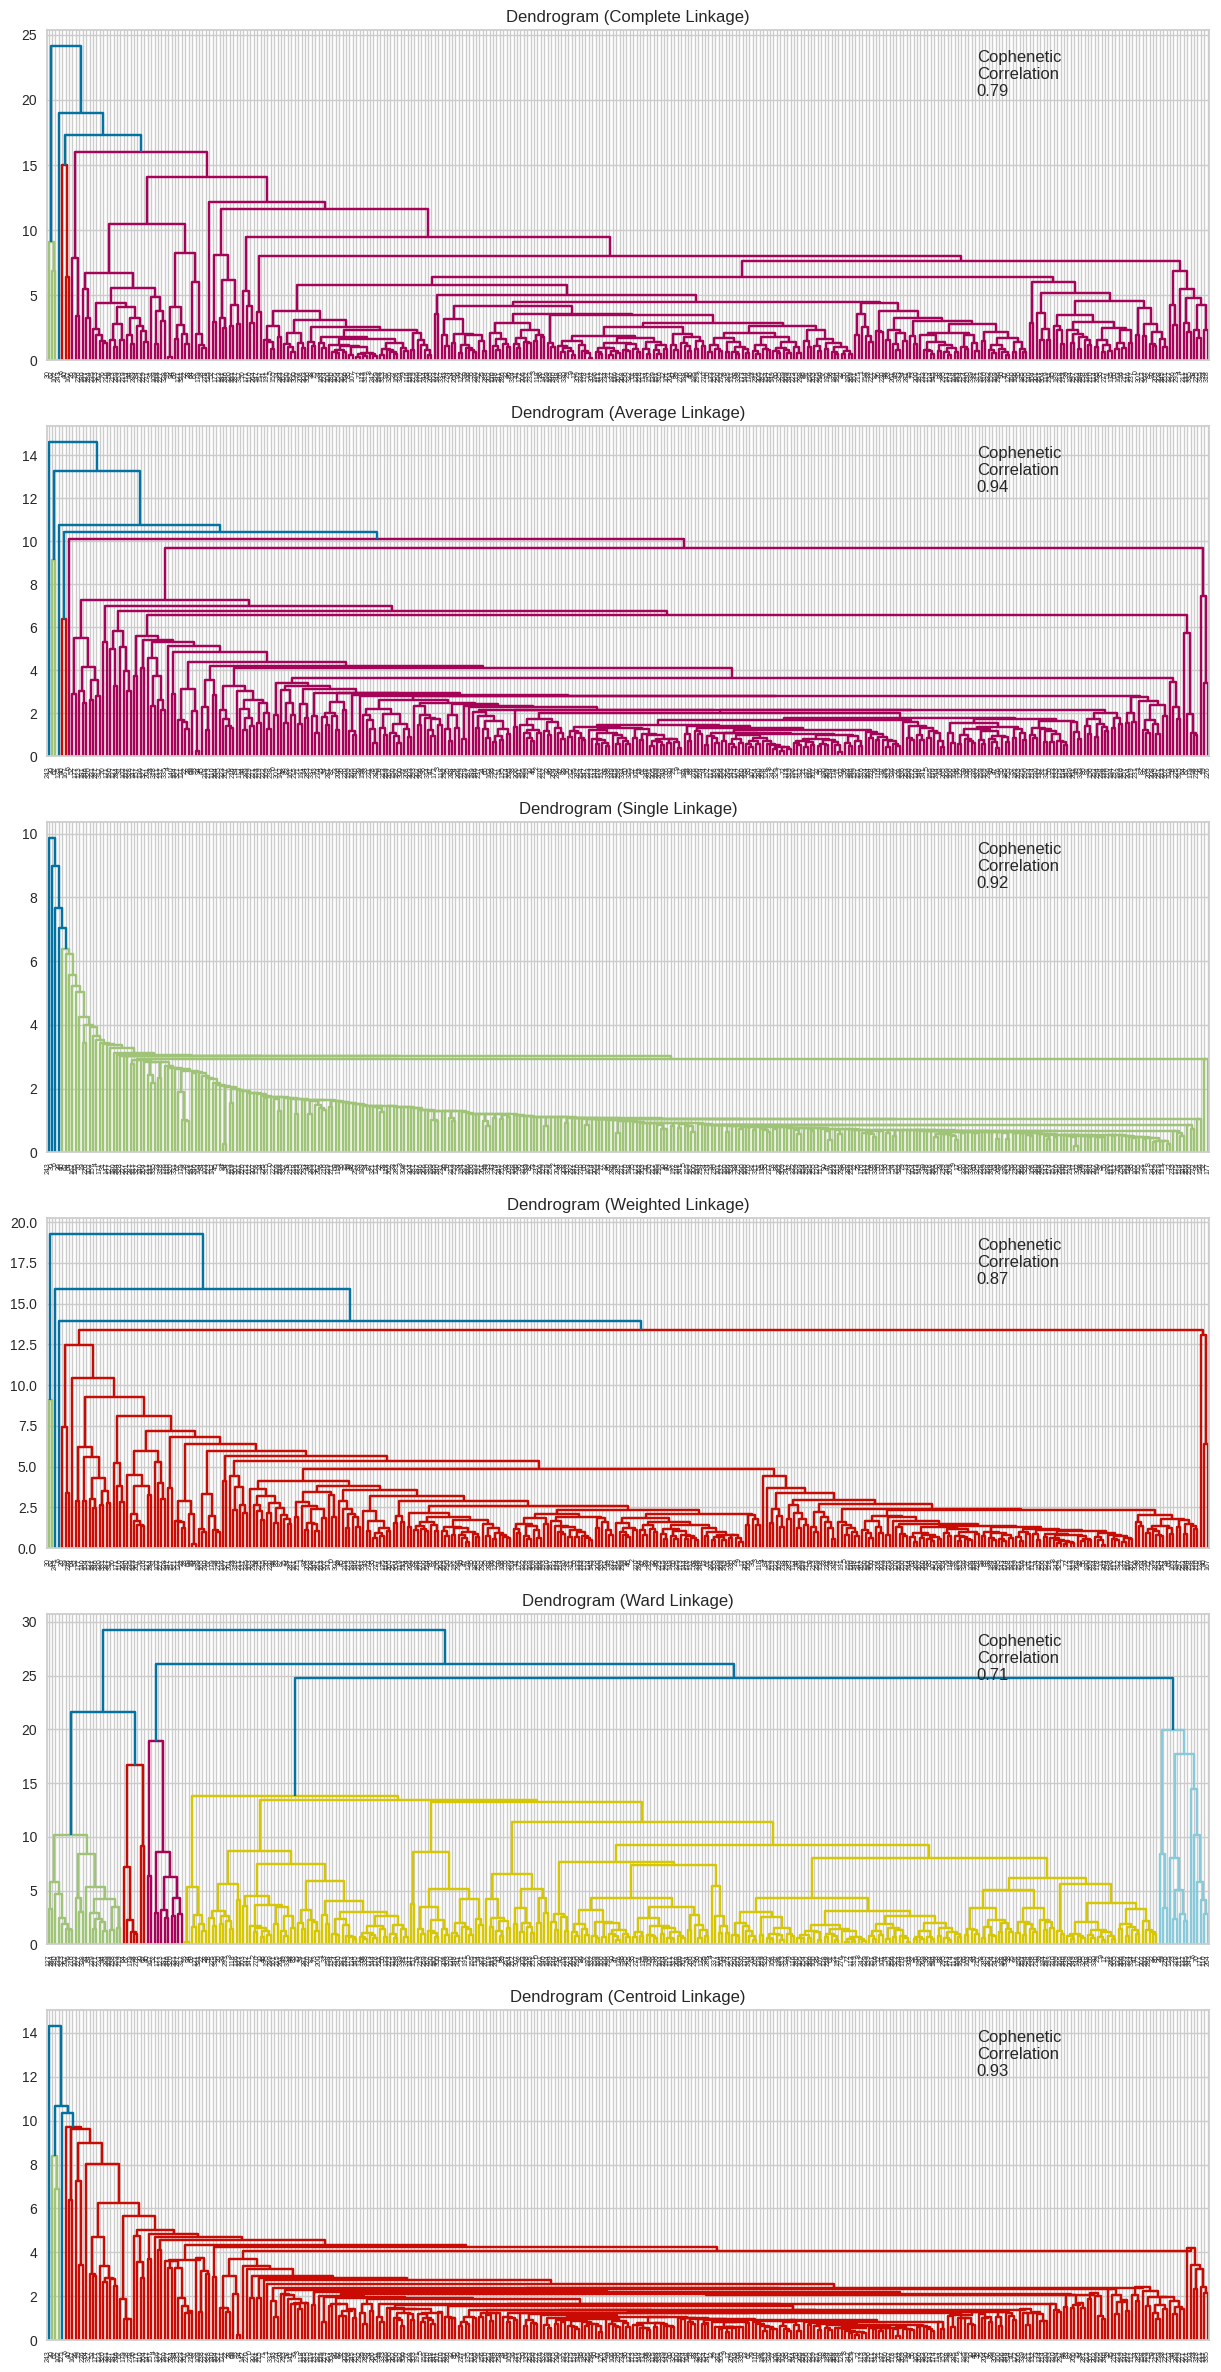

In [11]:
# list of linkage methods
linkage_methods = ["complete", "average", "single","weighted", "ward", "centroid"] ## code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled_new1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled_new1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [12]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
0,complete,0.787328
3,weighted,0.869378
2,single,0.923227
5,centroid,0.931401
1,average,0.942254


## Observation
#### It will be observed that although the average linkage method whose cophenetic correlation was the highest did not give appropriate clustering for the use case from the dendrogram. But the ward linkage method with a cophenetic correlation of 0.71 provided a reasonably good clustering of 6 which is suitable for the use case.

## Creating the model using the sklearn

In [27]:
#make a copy of the original data
df_orig = data.copy()


In [22]:
HCmodel = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')  ## code to define the hierarchical clustering model
HCmodel.fit(df_scaled_new1)

AgglomerativeClustering(n_clusters=7)

In [28]:
# adding hierarchical cluster labels to the original and scaled dataframes
df_scaled_new1["HC_segments"] = HCmodel.labels_
df_orig["HC_segments"] = HCmodel.labels_

## Cluster Profiling

In [33]:
# Grouping the clusters and getting the mean of each clusters
hc_cluster_profile = df_orig.groupby("HC_segments").mean(numeric_only= True)  ## code to groupby the cluster labels

In [34]:
# Grouping the clusters and getting the count in each clusters
hc_cluster_profile["count_in_each_segment"] = (
    df_orig.groupby("HC_segments")["Security"].count().values  ## code to groupby the cluster labels
)

In [35]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,12
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
4,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2


In [36]:
##  code to print the companies in each cluster
for cl in df_orig["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_orig[df_orig["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 4, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [37]:
df_orig.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Energy                         20
             Information Technology          1
             Materials                       1
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
4            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
5            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
6            Financials                      1
             Information Technology          1
Name: Security, dtype: int64

In [41]:
# Getting only the numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

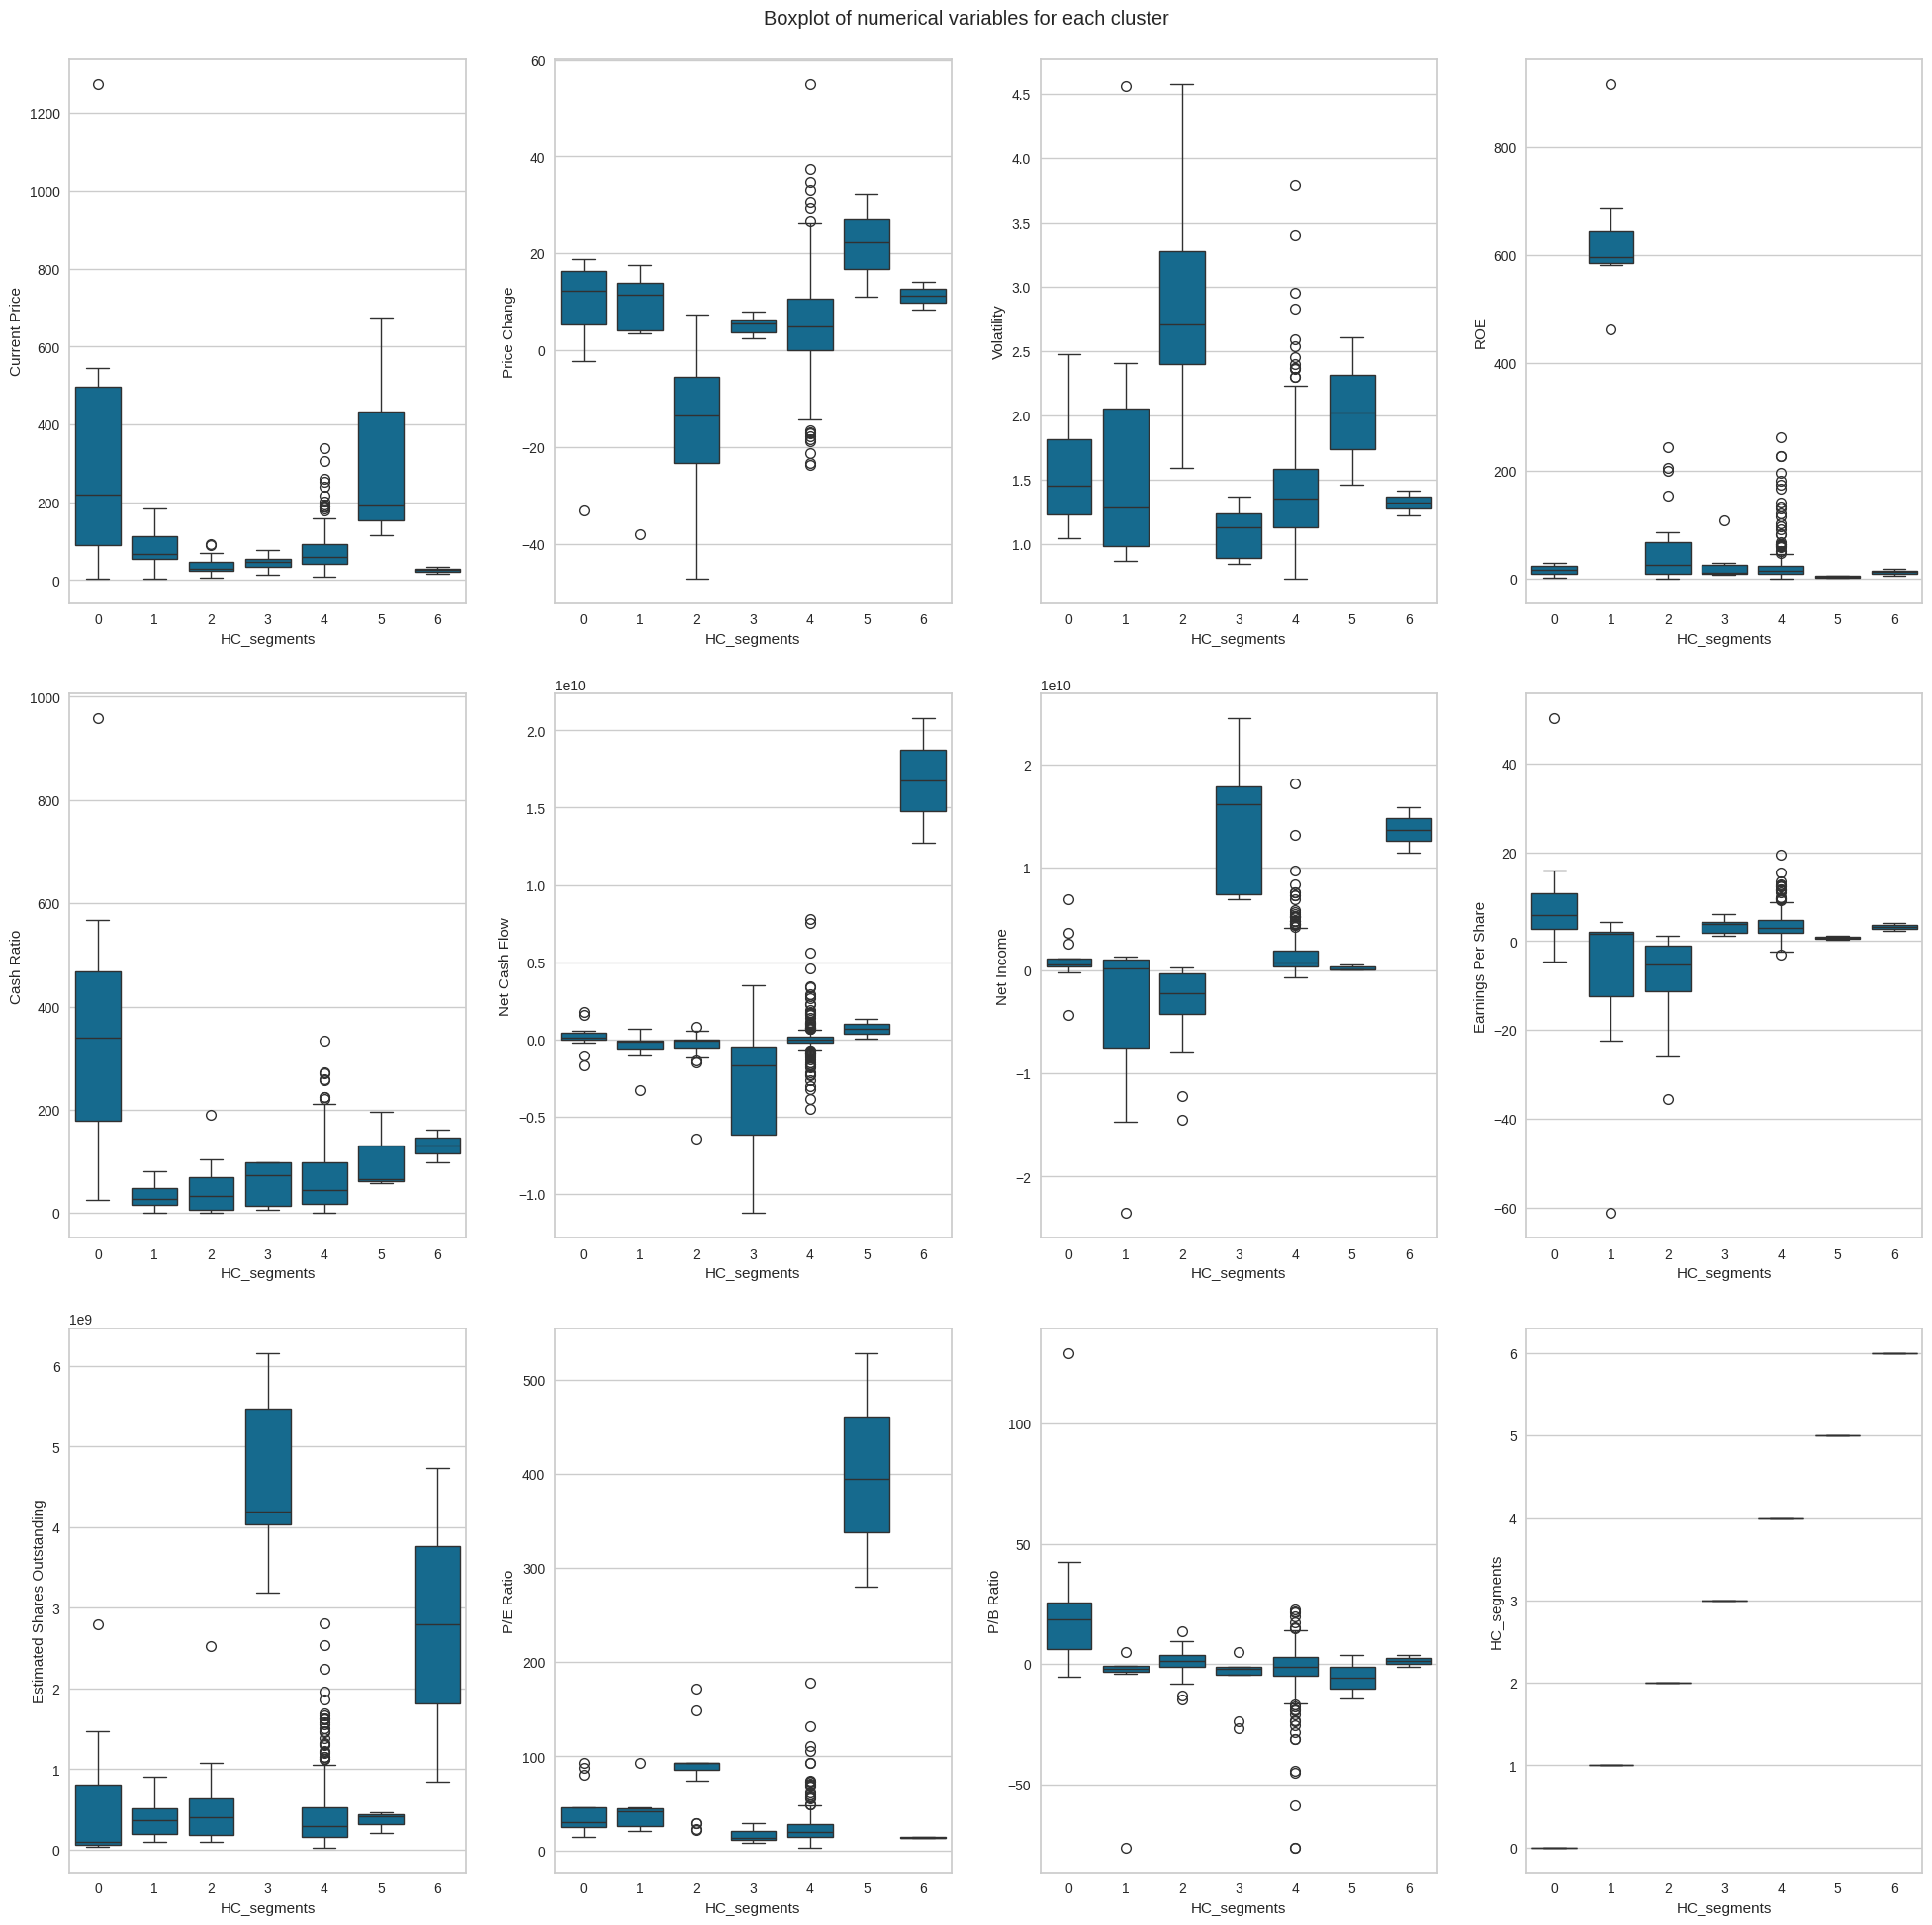

In [42]:
#Plotting the boxplots of the numerical variables for each cluster
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_orig, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## Description og the different clusters from the Hierarchical clustering method

**Cluster 0**
-	High current price
-	Medium price change
-	High volatility
-	Low ROE
-	High cash ratio
-	Low net cash flow
-	Medium net income
-	High earnings per share
-	Low estimated shares outstanding
-	Medium P/E ratio
-	High P/B ratio

**Cluster 1**
-	Medium current price
-	Medium price change
-	High volatility
-	High ROE
-	Low cash ratio
-	Low net cash flow
-	Low net income
-	Low earnings per share
-	Medium estimated shares outstanding
-	Medium P/E ratio
-	Low P/B ratio


**Cluster 2**
-	Low current price
-	High price change
-	High volatility
-	Medium ROE
-	Low cash ratio
-	Low net cash flow
-	Low net income
-	Low earnings per share
-	Medium estimated shares outstanding
-	Medium P/E ratio
-	Low P/B ratio

**Cluster 3**
-	Low current price
-	Low price change
-	Medium volatility
-	Low ROE
-	Medium cash ratio
-	Low net cash flow
-	High net income
-	Medium earnings per share
-	High estimated shares outstanding
-	Low P/E ratio
-	Low P/B ratio

**Cluster 4**
-	Medium current price
-	High price change
-	High volatility
-	Medium ROE
-	Medium cash ratio
-	Low net cash flow
-	Medium net income
-	Medium earnings per share
-	Medium estimated shares outstanding
-	Low P/E ratio
-	Low P/B ratio

**Cluster 5**
-	High current price
-	Medium price change
-	High volatility
-	Low ROE
-	Medium cash ratio
-	Low net cash flow
-	Medium net income
-	Medium earnings per share
-	Medium estimated shares outstanding
-	High P/E ratio
-	Low P/B ratio

**Cluster 6**
-	Low current price
-	Low price change
-	Low volatility
-	Low ROE
-	High cash ratio
-	High net cash flow
-	High net income
-	Medium earnings per share
-	High estimated shares outstanding
-	Low P/E ratio
-	Low P/B ratio


## K-means vs Hierarchical Clustering

#### It was observed that the K-Means clustering was faster in execution compared to the Hierarchical clustering. However, the hierarchical clustering gave more distinct clusters compared to the K-Means clustering even when the number of clusters are the same.

#### Although the number of clusters appear to be the same, but the number of observations in similar clusters are not the same. For instance, the cluster with the largest observation using the K-means clustering was cluster 1 with 202 observations while using the hierachical clustering, it was cluster 4 with 285 observations. The only cluster that had similar observations in both clustering methods was cluster 5 with only 3 observations.

#### It was also observed that the characteristics of the numerical features of some of the clusters are similar on using both the K-means and Hierarchical clustering methods. For instance, in clusters 2, 3 and 5, the description of the current price, volatility and earnings per share are the same for both methods.



## Actionable Insights and Recommendations
- On using the K-means and Hierarchical clustering methods, the total number of observations were grouped into 7 distinct clusters. Hierarchical clustering gave better distinct clusters compared to the K-means clustering method.

- Stocks in clusters 0 and 1 can be grouped as category 1 stocks because they are stocks that are not very expensive and not very cheap either but such stocks have a reasonably good earnings per share which means that shareholders can still make good profit from such stocks.Stocks with reasonably high earnings per share including Industrials, Health Care, Financials, and Consumer Discretionary are recommended for investors within this category. However stocks in cluster 1 will be recommended for long term investment since the volatility and price change for the stocks are low and recommended stocks includes Consumer Staples and Utilities.

- Stocks in cluster 2 can be grouped as category 2 stocks since such stocks are highly volatile in their price and very low earnings per share. Although the price of the stocks are low but investors may not have sufficient confidence in them to make profit.

- Stocks in clusters 3, and 6 can be grouped as category 3 stocks since they are very cheap in terms of their price and they yield a resonably good earnings per share. Infact most investors will go for such stocks due to their low price and their potential to yield high return. However stocks in cluster 4 can be recommended for long time investment since their price change is low and the price volatility is very low while stocks in clusters 3 and 6 can be recommended for short term investment due to their high price volatility.

- Stocks in cluster 5 can be grouped as category 4 stocks since they are very expensive with a very high volatility in price and an average earning per share. Such stocks are recommended for short term investors.